### Comparação entre As funções do SKlearn para seleção de features e do Método de wrapper implementado

#### Vão ser selecionado os modelos DT classifier e regressor, Ada Boost classifier e regressor

In [1]:
import pandas as pd
import numpy as np
import ast
from Wrapper import ForwardFeatureSelector, BackwardFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector, VarianceThreshold
from joblib import load

In [2]:
#importando os modelos
Ada_Boost_clf = load('./../models/models_salvos/Ada_Boost_classifier.joblib')
Ada_Boost_rgs = load('./../models/models_salvos/Ada_Boost_regressor.joblib')
dt_clf = load('./../models/models_salvos/dt_classifier.joblib')
dt_rgs = load('./../models/models_salvos/dt_regressor.joblib')

In [3]:
# abrindo os dados de treinamento
df = pd.read_csv("./../ansatz_result/data.csv")
X = df.drop(columns=["target"]).to_numpy()
y = pd.DataFrame(df['target'].apply(ast.literal_eval).tolist()).to_numpy()

# Para cada amostra, identificar o ansatz com maior acurácia
y_best_ansatz = np.argmax(y, axis=1)  # Retorna índices 0-29

#### Ada Boost classifier

In [4]:
# implementação do método de wrapper forward
selector = ForwardFeatureSelector(
    model=Ada_Boost_clf,
    model_type="sklearn",
    scoring="accuracy",
    cv=3,
    verbose=1
    )

In [5]:
X_ada_clf_forward = selector.fit_transform(X, y_best_ansatz)

Testing feature set: [0]
Testing feature set: [1]
Testing feature set: [2]
Testing feature set: [3]
Testing feature set: [4]
Testing feature set: [5]
Testing feature set: [6]
Testing feature set: [7]
Testing feature set: [8]
Testing feature set: [9]
Testing feature set: [10]
Testing feature set: [11]
Testing feature set: [12]
Testing feature set: [13]
Testing feature set: [14]
Testing feature set: [15]
Testing feature set: [16]
Testing feature set: [17]
Testing feature set: [18]
Testing feature set: [19]
Testing feature set: [20]
Testing feature set: [21]
Selected feature: 17 | Score: 0.2917
Testing feature set: [17, 0]
Testing feature set: [17, 1]
Testing feature set: [17, 2]
Testing feature set: [17, 3]
Testing feature set: [17, 4]
Testing feature set: [17, 5]
Testing feature set: [17, 6]
Testing feature set: [17, 7]
Testing feature set: [17, 8]
Testing feature set: [17, 9]
Testing feature set: [17, 10]
Testing feature set: [17, 11]
Testing feature set: [17, 12]
Testing feature set: 

In [6]:
selector2 = BackwardFeatureSelector(
    model=Ada_Boost_clf,
    model_type="sklearn",
    scoring="accuracy",
    cv=3,
    verbose=1
)

# implementação do método de wrapper backward
X_ada_clf_backward = selector2.fit_transform(X, y_best_ansatz)

Testando subconjunto: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto

In [7]:
print(selector.selected_features)

[17, 4, 18]


In [8]:
print(selector2.selected_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [9]:
# método de wrapper forward do sklearn
sfs_forward = SequentialFeatureSelector(Ada_Boost_clf, tol=0.01, direction="forward", scoring='accuracy', n_jobs=12, cv=3)

sfs_forward.fit(X, y_best_ansatz)

/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least

SequentialFeatureSelector(cv=3,
                          estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                                       n_estimators=5,
                                                       random_state=42),
                          n_jobs=12, scoring='accuracy', tol=0.01)

In [10]:
print(sfs_forward.get_feature_names_out())


['x17']


In [11]:
X_ada_clf_forward_sk = sfs_forward.transform(X)

In [12]:
# método de wrapper backward do sklearn
sfs_backward = SequentialFeatureSelector(Ada_Boost_clf, tol=0.01, direction="backward", scoring='accuracy', n_jobs=12, cv=3)
sfs_backward.fit(X, y_best_ansatz)

/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least

SequentialFeatureSelector(cv=3, direction='backward',
                          estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                                       n_estimators=5,
                                                       random_state=42),
                          n_jobs=12, scoring='accuracy', tol=0.01)

In [13]:
print(sfs_backward.get_feature_names_out())

['x0' 'x1' 'x2' 'x4' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13' 'x14'
 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21']


In [14]:
X_ada_clf_backward_sk = sfs_backward.transform(X)

In [15]:
# variance threshold do sklearn, removendo variáveis com baixa variância

selector3 = VarianceThreshold(0.0)
x_var = selector3.fit_transform(X)

In [16]:
print(selector3.get_feature_names_out())

['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14' 'x15' 'x16' 'x17' 'x18' 'x19']


#### DT classifier

In [17]:
# implementação do método de wrapper forward
selector = ForwardFeatureSelector(
    model=dt_clf,
    model_type="sklearn",
    scoring="accuracy",
    cv=3,
    verbose=1
    )

In [18]:
X_dt_clf_forward = selector.fit_transform(X, y_best_ansatz)

Testing feature set: [0]
Testing feature set: [1]
Testing feature set: [2]
Testing feature set: [3]
Testing feature set: [4]
Testing feature set: [5]
Testing feature set: [6]
Testing feature set: [7]
Testing feature set: [8]
Testing feature set: [9]
Testing feature set: [10]
Testing feature set: [11]
Testing feature set: [12]
Testing feature set: [13]
Testing feature set: [14]
Testing feature set: [15]
Testing feature set: [16]
Testing feature set: [17]
Testing feature set: [18]
Testing feature set: [19]
Testing feature set: [20]
Testing feature set: [21]
Selected feature: 3 | Score: 0.3361
Testing feature set: [3, 0]
Testing feature set: [3, 1]
Testing feature set: [3, 2]
Testing feature set: [3, 4]
Testing feature set: [3, 5]
Testing feature set: [3, 6]
Testing feature set: [3, 7]
Testing feature set: [3, 8]
Testing feature set: [3, 9]
Testing feature set: [3, 10]
Testing feature set: [3, 11]
Testing feature set: [3, 12]
Testing feature set: [3, 13]
Testing feature set: [3, 14]
Testi

In [19]:
selector2 = BackwardFeatureSelector(
    model=dt_clf,
    model_type="sklearn",
    scoring="accuracy",
    cv=3,
    verbose=1
)

# implementação do método de wrapper backward
X_dt_clf_backward = selector2.fit_transform(X, y_best_ansatz)

Testando subconjunto: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto

In [20]:
print(selector.selected_features)

[3, 7]


In [21]:
print(selector2.selected_features)

[1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 15, 18, 19, 20, 21]


In [22]:
# método de wrapper forward do sklearn
sfs_forward = SequentialFeatureSelector(dt_clf, tol=0.01, direction="forward", scoring='accuracy', n_jobs=12, cv=3)

sfs_forward.fit(X, y_best_ansatz)

/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least

SequentialFeatureSelector(cv=3,
                          estimator=DecisionTreeClassifier(min_samples_leaf=2,
                                                           min_samples_split=30,
                                                           random_state=45),
                          n_jobs=12, scoring='accuracy', tol=0.01)

In [23]:
print(sfs_forward.get_feature_names_out())


['x3']


In [24]:
X_dt_clf_forward_sk = sfs_forward.transform(X)

In [25]:
# método de wrapper backward do sklearn
sfs_backward = SequentialFeatureSelector(dt_clf, tol=0.01, direction="backward", scoring='accuracy', n_jobs=12, cv=3)
sfs_backward.fit(X, y_best_ansatz)

/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/brunoadsb/Desktop/venvs/IA_venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least

SequentialFeatureSelector(cv=3, direction='backward',
                          estimator=DecisionTreeClassifier(min_samples_leaf=2,
                                                           min_samples_split=30,
                                                           random_state=45),
                          n_jobs=12, scoring='accuracy', tol=0.01)

In [26]:
print(sfs_backward.get_feature_names_out())

['x0' 'x1' 'x2' 'x4' 'x5' 'x6' 'x7' 'x8' 'x10' 'x11' 'x12' 'x13' 'x14'
 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21']


In [27]:
X_dt_clf_backward_sk = sfs_backward.transform(X)

#### Ada Boost regressor

In [28]:
# implementação do método de wrapper forward
selector = ForwardFeatureSelector(
    model=Ada_Boost_rgs,
    model_type="sklearn",
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=1
    )

In [29]:
X_ada_rgs_forward = selector.fit_transform(X, y)

Testing feature set: [0]
Testing feature set: [1]
Testing feature set: [2]
Testing feature set: [3]
Testing feature set: [4]
Testing feature set: [5]
Testing feature set: [6]
Testing feature set: [7]
Testing feature set: [8]
Testing feature set: [9]
Testing feature set: [10]
Testing feature set: [11]
Testing feature set: [12]
Testing feature set: [13]
Testing feature set: [14]
Testing feature set: [15]
Testing feature set: [16]
Testing feature set: [17]
Testing feature set: [18]
Testing feature set: [19]
Testing feature set: [20]
Testing feature set: [21]
Selected feature: 13 | Score: -0.0010
Testing feature set: [13, 0]
Testing feature set: [13, 1]
Testing feature set: [13, 2]
Testing feature set: [13, 3]
Testing feature set: [13, 4]
Testing feature set: [13, 5]
Testing feature set: [13, 6]
Testing feature set: [13, 7]
Testing feature set: [13, 8]
Testing feature set: [13, 9]
Testing feature set: [13, 10]
Testing feature set: [13, 11]
Testing feature set: [13, 12]
Testing feature set:

In [37]:
selector2 = BackwardFeatureSelector(
    model=Ada_Boost_rgs,
    model_type="sklearn",
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=1
)

# implementação do método de wrapper backward
X_ada_rgs_backward = selector2.fit_transform(X, y)

Testando subconjunto: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto

In [38]:
print(selector.selected_features)

[13, 18, 9]


In [39]:
print(selector2.selected_features)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21]


In [40]:
# método de wrapper forward do sklearn
sfs_forward = SequentialFeatureSelector(Ada_Boost_rgs, tol=0.01, direction="forward", scoring='neg_mean_squared_error', n_jobs=12, cv=3)

sfs_forward.fit(X, y)

SequentialFeatureSelector(cv=3,
                          estimator=MultiOutputRegressor(estimator=AdaBoostRegressor()),
                          n_jobs=12, scoring='neg_mean_squared_error',
                          tol=0.01)

In [41]:
print(sfs_forward.get_feature_names_out())


['x9']


In [42]:
X_ada_rgs_forward_sk = sfs_forward.transform(X)

In [43]:
# método de wrapper backward do sklearn
sfs_backward = SequentialFeatureSelector(Ada_Boost_rgs, tol=0.01, direction="backward", scoring='neg_mean_squared_error', n_jobs=12, cv=3)
sfs_backward.fit(X, y)

SequentialFeatureSelector(cv=3, direction='backward',
                          estimator=MultiOutputRegressor(estimator=AdaBoostRegressor()),
                          n_jobs=12, scoring='neg_mean_squared_error',
                          tol=0.01)

In [44]:
print(sfs_backward.get_feature_names_out())

['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x12' 'x13' 'x14'
 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21']


In [45]:
X_ada_rgs_backward_sk = sfs_backward.transform(X)

#### DT regressor

In [46]:
# implementação do método de wrapper forward
selector = ForwardFeatureSelector(
    model=dt_rgs,
    model_type="sklearn",
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=1
    )

In [47]:
X_dt_rgs_forward = selector.fit_transform(X, y)

Testing feature set: [0]
Testing feature set: [1]
Testing feature set: [2]
Testing feature set: [3]
Testing feature set: [4]
Testing feature set: [5]
Testing feature set: [6]
Testing feature set: [7]
Testing feature set: [8]
Testing feature set: [9]
Testing feature set: [10]
Testing feature set: [11]
Testing feature set: [12]
Testing feature set: [13]
Testing feature set: [14]
Testing feature set: [15]
Testing feature set: [16]
Testing feature set: [17]
Testing feature set: [18]
Testing feature set: [19]
Testing feature set: [20]
Testing feature set: [21]
Selected feature: 13 | Score: -0.0010
Testing feature set: [13, 0]
Testing feature set: [13, 1]
Testing feature set: [13, 2]
Testing feature set: [13, 3]
Testing feature set: [13, 4]
Testing feature set: [13, 5]
Testing feature set: [13, 6]
Testing feature set: [13, 7]
Testing feature set: [13, 8]
Testing feature set: [13, 9]
Testing feature set: [13, 10]
Testing feature set: [13, 11]
Testing feature set: [13, 12]
Testing feature set:

In [48]:
selector2 = BackwardFeatureSelector(
    model=dt_rgs,
    model_type="sklearn",
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=1
)

# implementação do método de wrapper backward
X_dt_rgs_backward = selector2.fit_transform(X, y)

Testando subconjunto: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Testando subconjunto

In [49]:
print(selector.selected_features)

[13, 12, 9, 16, 3, 17, 7]


In [50]:
print(selector2.selected_features)

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [51]:
# método de wrapper forward do sklearn
sfs_forward = SequentialFeatureSelector(dt_rgs, tol=0.01, direction="forward", scoring='neg_mean_squared_error', n_jobs=12, cv=3)

sfs_forward.fit(X, y)

SequentialFeatureSelector(cv=3,
                          estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                          min_samples_leaf=4,
                                                          min_samples_split=25,
                                                          random_state=45),
                          n_jobs=12, scoring='neg_mean_squared_error',
                          tol=0.01)

In [52]:
print(sfs_forward.get_feature_names_out())


['x7']


In [53]:
X_dt_rgs_forward_sk = sfs_forward.transform(X)

In [54]:
# método de wrapper backward do sklearn
sfs_backward = SequentialFeatureSelector(dt_rgs, tol=0.01, direction="backward", scoring='neg_mean_squared_error', n_jobs=12, cv=3)
sfs_backward.fit(X, y)

SequentialFeatureSelector(cv=3, direction='backward',
                          estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                          min_samples_leaf=4,
                                                          min_samples_split=25,
                                                          random_state=45),
                          n_jobs=12, scoring='neg_mean_squared_error',
                          tol=0.01)

In [55]:
print(sfs_backward.get_feature_names_out())

['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21']


In [56]:
X_dt_rgs_backward_sk = sfs_backward.transform(X)

Exception ignored in: <function ResourceTracker.__del__ at 0x77c634c92de0>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x76b5ee28ede0>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x79a2dad86de0>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/reso

#### re-treinando os modelos com as features selecionadas por cada seletor

In [57]:
from sklearn.base import clone

In [58]:
# Clonando os modelos para evitar o erro de ajuste
ada_clf_forward = clone(Ada_Boost_clf)
ada_clf_backward = clone(Ada_Boost_clf)
ada_clf_forward_sk = clone(Ada_Boost_clf)
ada_clf_backward_sk = clone(Ada_Boost_clf)

ada_rgs_forward = clone(Ada_Boost_rgs)
ada_rgs_backward = clone(Ada_Boost_rgs)
ada_rgs_forward_sk = clone(Ada_Boost_rgs)
ada_rgs_backward_sk = clone(Ada_Boost_rgs)


dt_clf_forward = clone(dt_clf)
dt_clf_backward = clone(dt_clf)
dt_clf_forward_sk = clone(dt_clf)
dt_clf_backward_sk = clone(dt_clf)

dt_rgs_forward = clone(dt_rgs)
dt_rgs_backward = clone(dt_rgs)
dt_rgs_forward_sk = clone(dt_rgs)
dt_rgs_backward_sk = clone(dt_rgs)

ada_clf_treshold = clone(Ada_Boost_clf)
dt_clf_treshold = clone(dt_clf)
ada_rgs_treshold = clone(Ada_Boost_rgs)
dt_rgs_treshold = clone(dt_rgs)

In [59]:
# Ajustando os modelos
ada_clf_forward.fit(X_ada_clf_forward, y_best_ansatz)
ada_clf_backward.fit(X_ada_clf_backward, y_best_ansatz)
ada_clf_forward_sk.fit(X_ada_clf_forward_sk, y_best_ansatz)
ada_clf_backward_sk.fit(X_ada_clf_backward_sk, y_best_ansatz)

dt_clf_forward.fit(X_dt_clf_forward, y_best_ansatz)
dt_clf_backward.fit(X_dt_clf_backward, y_best_ansatz)
dt_clf_forward_sk.fit(X_dt_clf_forward_sk, y_best_ansatz)
dt_clf_backward_sk.fit(X_dt_clf_backward_sk, y_best_ansatz)

ada_rgs_forward.fit(X_ada_rgs_forward, y)
ada_rgs_backward.fit(X_ada_rgs_backward, y)
ada_rgs_forward_sk.fit(X_ada_rgs_forward_sk, y)
ada_rgs_backward_sk.fit(X_ada_rgs_backward_sk, y)

dt_rgs_forward.fit(X_dt_rgs_forward, y)
dt_rgs_backward.fit(X_dt_rgs_backward, y)
dt_rgs_forward_sk.fit(X_dt_rgs_forward_sk, y)
dt_rgs_backward_sk.fit(X_dt_rgs_backward_sk, y)

ada_clf_treshold.fit(x_var, y_best_ansatz)
dt_clf_treshold.fit(x_var, y_best_ansatz)
ada_rgs_treshold.fit(x_var, y)
dt_rgs_treshold.fit(x_var, y)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=4,
                      min_samples_split=25, random_state=45)

#### re-validando os novos modelos com os dados de validação

In [66]:
# abrindo os dados de validação
df = pd.read_csv("./../val/data_val.csv")
X = df.drop(columns=["target"]).to_numpy()
y = pd.DataFrame(df['target'].apply(ast.literal_eval).tolist()).to_numpy()

# Para cada amostra, identificar o ansatz com maior acurácia
y_best_ansatz = np.argmax(y, axis=1)  # Retorna índices 0-29

In [67]:
# Deixando os inputs dos dados de validação com o mesmo formato de cada modelo

X_ada_clf_forward = X[:, [17, 4, 18]]
X_ada_clf_backward = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]
X_ada_clf_forward_sk = X[:, [17]]
X_ada_clf_backward_sk = X[:, [0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]

X_treshold = X[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]   

X_dt_clf_forward = X[:, [3, 7]]
X_dt_clf_backward = X[:, [1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 15, 18, 19, 20, 21]]
X_dt_clf_forward_sk = X[:, [3]]
X_dt_clf_backward_sk = X[:, [0,1,2,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21]]

X_ada_rgs_forward = X[:, [13, 18, 9]]
X_ada_rgs_backward = X[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21]]
X_ada_rgs_forward_sk = X[:, [9]]
X_ada_rgs_backward_sk = X[:, [0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21]]

X_dt_rgs_forward = X[:, [13, 12, 9, 16, 3, 17, 7]]
X_dt_rgs_backward = X[:, [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]
X_dt_rgs_forward_sk = X[:, [7]]
X_dt_rgs_backward_sk = X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21]]

In [ ]:
# Predição dos modelos para os dados de validação

y_pred_ada_clf_forward = []
y_pred_ada_clf_backward = []
y_pred_ada_clf_forward_sk = []
y_pred_ada_clf_backward_sk = []

y_pred_dt_clf_forward = []
y_pred_dt_clf_backward = []
y_pred_dt_clf_forward_sk = []
y_pred_dt_clf_backward_sk = []

y_pred_ada_rgs_forward = []
y_pred_ada_rgs_backward = []
y_pred_ada_rgs_forward_sk = []
y_pred_ada_rgs_backward_sk = []

y_pred_dt_rgs_forward = []
y_pred_dt_rgs_backward = []
y_pred_dt_rgs_forward_sk = []
y_pred_dt_rgs_backward_sk = []

y_pred_ada_clf_treshold = []
y_pred_dt_clf_treshold = []
y_pred_ada_rgs_treshold = []
y_pred_dt_rgs_treshold = []

for i in range(len(X)):

    y_pred_ada_clf_forward.append(ada_clf_forward.predict(X_ada_clf_forward[i].reshape(1, -1)))
    y_pred_ada_clf_backward.append(ada_clf_backward.predict(X_ada_clf_backward[i].reshape(1, -1)))
    y_pred_ada_clf_forward_sk.append(ada_clf_forward_sk.predict(X_ada_clf_forward_sk[i].reshape(1, -1)))
    y_pred_ada_clf_backward_sk.append(ada_clf_backward_sk.predict(X_ada_clf_backward_sk[i].reshape(1, -1)))

    y_pred_dt_clf_forward.append(dt_clf_forward.predict(X_dt_clf_forward[i].reshape(1, -1)))
    y_pred_dt_clf_backward.append(dt_clf_backward.predict(X_dt_clf_backward[i].reshape(1, -1)))
    y_pred_dt_clf_forward_sk.append(dt_clf_forward_sk.predict(X_dt_clf_forward_sk[i].reshape(1, -1)))
    y_pred_dt_clf_backward_sk.append(dt_clf_backward_sk.predict(X_dt_clf_backward_sk[i].reshape(1, -1)))

    y_pred_ada_rgs_forward.append(ada_rgs_forward.predict(X_ada_rgs_forward[i].reshape(1, -1)))
    y_pred_ada_rgs_backward.append(ada_rgs_backward.predict(X_ada_rgs_backward[i].reshape(1, -1)))
    y_pred_ada_rgs_forward_sk.append(ada_rgs_forward_sk.predict(X_ada_rgs_forward_sk[i].reshape(1, -1)))
    y_pred_ada_rgs_backward_sk.append(ada_rgs_backward_sk.predict(X_ada_rgs_backward_sk[i].reshape(1, -1)))

    y_pred_dt_rgs_forward.append(dt_rgs_forward.predict(X_dt_rgs_forward[i].reshape(1, -1)))
    y_pred_dt_rgs_backward.append(dt_rgs_backward.predict(X_dt_rgs_backward[i].reshape(1, -1)))
    y_pred_dt_rgs_forward_sk.append(dt_rgs_forward_sk.predict(X_dt_rgs_forward_sk[i].reshape(1, -1)))
    y_pred_dt_rgs_backward_sk.append(dt_rgs_backward_sk.predict(X_dt_rgs_backward_sk[i].reshape(1, -1)))

    y_pred_ada_clf_treshold.append(ada_clf_treshold.predict(x_var[i].reshape(1, -1)))
    y_pred_dt_clf_treshold.append(dt_clf_treshold.predict(x_var[i].reshape(1, -1)))
    y_pred_ada_rgs_treshold.append(ada_rgs_treshold.predict(x_var[i].reshape(1, -1)))
    y_pred_dt_rgs_treshold.append(dt_rgs_treshold.predict(x_var[i].reshape(1, -1)))


In [71]:
# Transformando as listas em arrays
y_pred_ada_clf_forward = np.array([x[0] for x in y_pred_ada_clf_forward])
y_pred_ada_clf_backward = np.array([x[0] for x in y_pred_ada_clf_backward])
y_pred_ada_clf_forward_sk = np.array([x[0] for x in y_pred_ada_clf_forward_sk])
y_pred_ada_clf_backward_sk = np.array([x[0] for x in y_pred_ada_clf_backward_sk])

y_pred_dt_clf_forward = np.array([x[0] for x in y_pred_dt_clf_forward])
y_pred_dt_clf_backward = np.array([x[0] for x in y_pred_dt_clf_backward])
y_pred_dt_clf_forward_sk = np.array([x[0] for x in y_pred_dt_clf_forward_sk])
y_pred_dt_clf_backward_sk = np.array([x[0] for x in y_pred_dt_clf_backward_sk])

y_pred_ada_rgs_forward = np.array([x[0] for x in y_pred_ada_rgs_forward])
y_pred_ada_rgs_backward = np.array([x[0] for x in y_pred_ada_rgs_backward])
y_pred_ada_rgs_forward_sk = np.array([x[0] for x in y_pred_ada_rgs_forward_sk])
y_pred_ada_rgs_backward_sk = np.array([x[0] for x in y_pred_ada_rgs_backward_sk])

y_pred_dt_rgs_forward = np.array([x[0] for x in y_pred_dt_rgs_forward])
y_pred_dt_rgs_backward = np.array([x[0] for x in y_pred_dt_rgs_backward])
y_pred_dt_rgs_forward_sk = np.array([x[0] for x in y_pred_dt_rgs_forward_sk])
y_pred_dt_rgs_backward_sk = np.array([x[0] for x in y_pred_dt_rgs_backward_sk])

y_pred_ada_clf_treshold = np.array([x[0] for x in y_pred_ada_clf_treshold])
y_pred_dt_clf_treshold = np.array([x[0] for x in y_pred_dt_clf_treshold])
y_pred_ada_rgs_treshold = np.array([x[0] for x in y_pred_ada_rgs_treshold])
y_pred_dt_rgs_treshold = np.array([x[0] for x in y_pred_dt_rgs_treshold])


#### Funções dos plots

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_classifier(target, predicts, title):
    target = np.array(target)
    predicts = np.array(predicts)
    
    # 1. Matriz de Confusão (melhorada)
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(target, predicts)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(target), 
                yticklabels=np.unique(target),
                cbar=False)
    plt.xlabel('Previsto', fontsize=12)
    plt.ylabel('Real', fontsize=12)
    plt.title(f'Matriz de Confusão\n{title}', fontsize=14)
    plt.show()

    # 2. Gráfico de Performance (com porcentagem)
    acertos = accuracy_score(target, predicts, normalize=False)
    total = len(target)
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(['Acertos', 'Erros'], [acertos, total-acertos],
                  color=['#4CAF50', '#F44336'])
    
    # Adiciona valores nas barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height} ({height/total:.1%})',
                ha='center', va='bottom')
    
    plt.title(f'Performance do Modelo\nTotal: {total} amostras', fontsize=14)
    plt.ylabel('Contagem', fontsize=12)
    plt.ylim(0, total*1.1)
    plt.show()

    # 3. Histograma Comparativo (normalizado)
    plt.figure(figsize=(12, 6))
    plt.hist([target, predicts],
             bins=np.arange(len(np.unique(target)))+0.5,
             density=True,
             label=['Real', 'Previsto'],
             color=['#2196F3', '#FF9800'],
             alpha=0.7,
             edgecolor='black')
    
    plt.legend(fontsize=12)
    plt.xlabel('Classes', fontsize=12)
    plt.ylabel('Frequência Relativa', fontsize=12)
    plt.title('Distribuição das Classes (Normalizada)', fontsize=14)
    plt.xticks(np.unique(target))
    plt.grid(axis='y', alpha=0.3)
    plt.show()



In [75]:
#plots dos resultados dos modelos de regressão
from scipy.stats import gaussian_kde

def plot_regressor(target, predicts, title):

    #1. Heatmap de Desempenho Médio
    plt.figure(figsize=(18, 3))
    sns.heatmap(np.mean(predicts, axis=0).reshape(1, -1), 
                annot=True, cmap='YlGnBu',
                xticklabels=[f'A{i+1}' for i in range(30)],
                yticklabels=['Acurácia Média'])
    plt.title('Desempenho Médio por Ansatz')
    plt.show()
    
    #2. Gráfico de Intervalo (Média ± Desvio Padrão)
    # Cálculo de estatísticas
    mean_true = np.mean(target, axis=0)
    std_true = np.std(target, axis=0)
    mean_pred = np.mean(predicts, axis=0)
    std_pred = np.std(predicts, axis=0)
    
    n_ansatzes = target.shape[1]
    x = np.arange(n_ansatzes)  # Posições no eixo X
    width = 0.4  # Largura das barras

    # Configuração do gráfico
    plt.figure(figsize=(max(12, n_ansatzes * 0.5), 6))  # Ajuste automático de largura
    
    # Gráfico de erro para valores reais
    plt.errorbar(
        x - width/2, 
        mean_true, 
        yerr=std_true, 
        fmt='o', 
        color='#4CAF50', 
        ecolor='darkgreen', 
        elinewidth=2, 
        capsize=5, 
        label='Real'
    )
    
    # Gráfico de erro para valores previstos
    plt.errorbar(
        x + width/2, 
        mean_pred, 
        yerr=std_pred, 
        fmt='o', 
        color='#2196F3', 
        ecolor='darkblue', 
        elinewidth=2, 
        capsize=5, 
        label='Previsto'
    )

    # Customização
    plt.xticks(x, [f'Ansatz {i+1}' for i in range(n_ansatzes)], rotation=90)
    plt.ylabel('Acurácia (Média ± Desvio Padrão)')
    plt.title(title)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    #3. Heatmap de Diferenças Médias
    # Calcular diferenças médias
    mean_diff = np.mean(predicts - target, axis=0)

    plt.figure(figsize=(18, 3))
    plt.imshow(mean_diff.reshape(1, -1), cmap='coolwarm', aspect='auto', 
            vmin=-0.1, vmax=0.1)
    plt.colorbar(label='Diferença Média (Previsto - Real)')
    plt.yticks([])
    plt.xticks(np.arange(30), [f'A{i+1}' for i in range(30)], rotation=90)
    plt.title('Tendência do Modelo por Ansatz (Super/Subestimativa)')
    plt.show()

    #4. Gráfico de Dispersão com Densidade
    # Flatten dos dados
    all_true = target.flatten()
    all_pred = predicts.flatten()

    # Calcular densidade
    xy = np.vstack([all_true, all_pred])
    z = gaussian_kde(xy)(xy)

    plt.figure(figsize=(10, 8))
    plt.scatter(all_true, all_pred, c=z, s=50, alpha=0.6, cmap='viridis')
    plt.colorbar(label='Densidade dos Pontos')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Acurácia Real (Todas Execuções)')
    plt.ylabel('Acurácia Prevista (Todas Execuções)')
    plt.title('Relação com Todas as Amostras')
    plt.grid(True)
    plt.show()

#### PLOT DOS RESULTADOS PARA CLASSIFICADORES

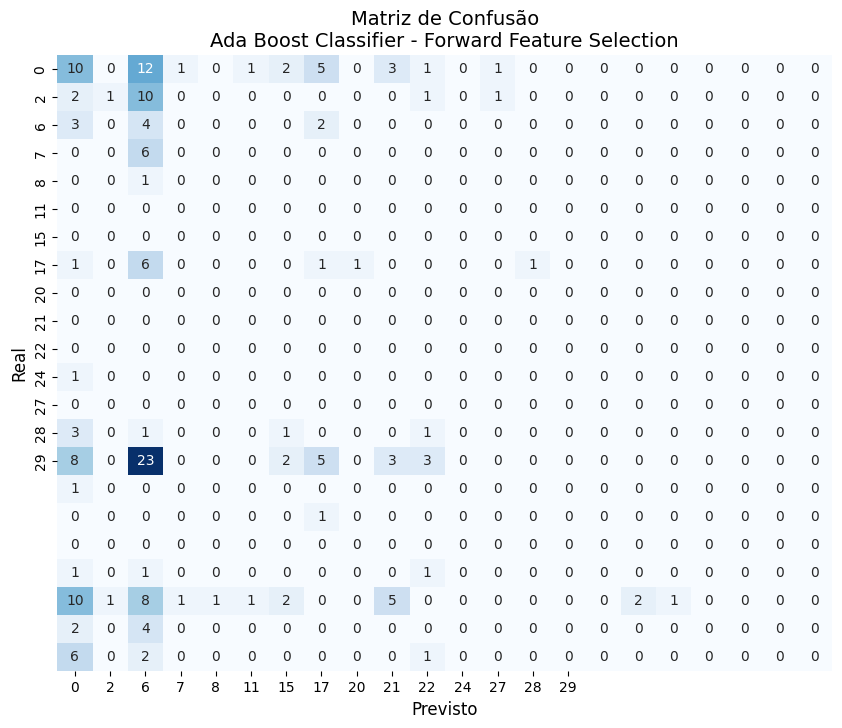

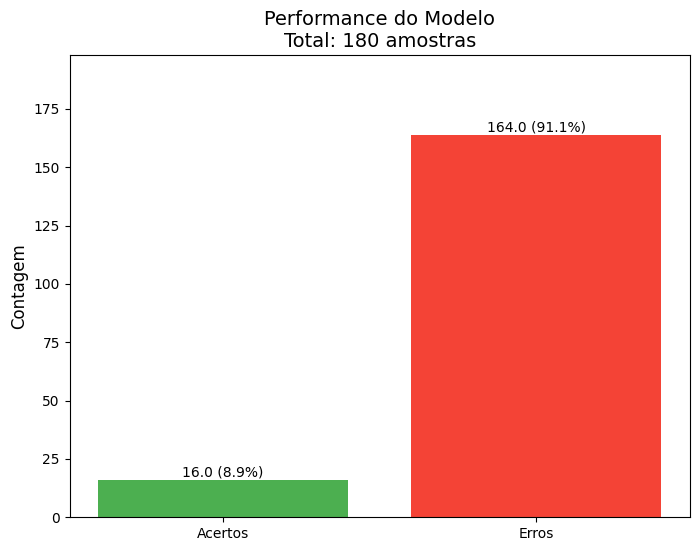

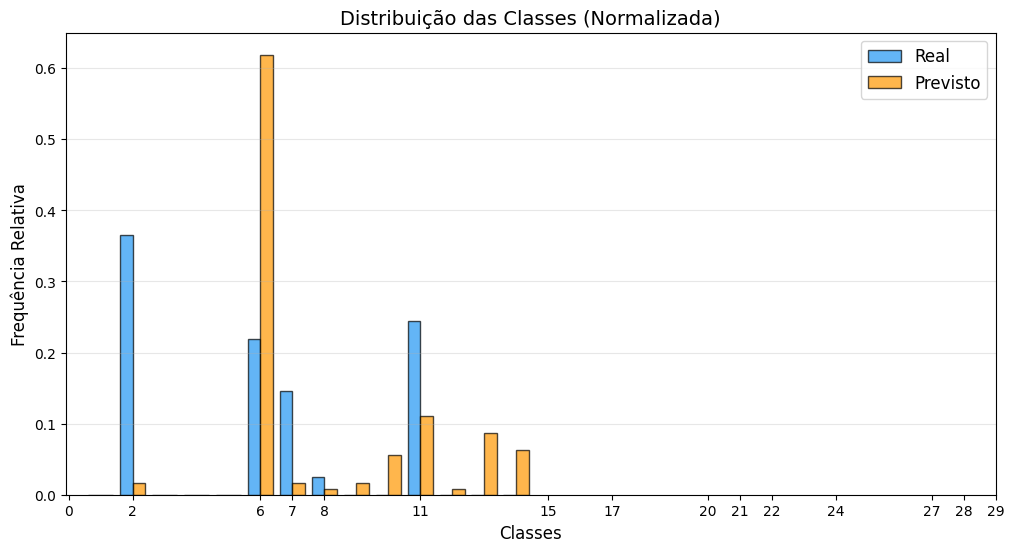

In [84]:
plot_classifier(y_best_ansatz, y_pred_ada_clf_forward, "Ada Boost Classifier - Forward Feature Selection")

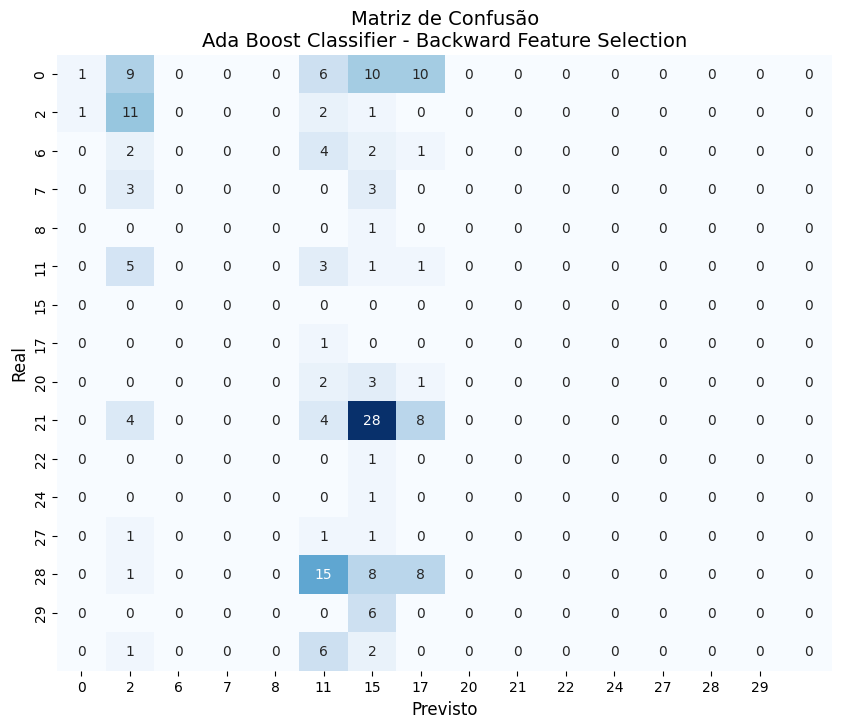

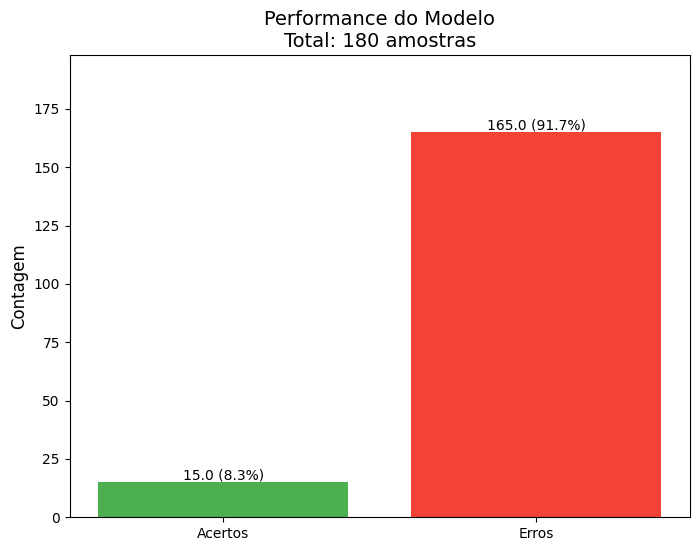

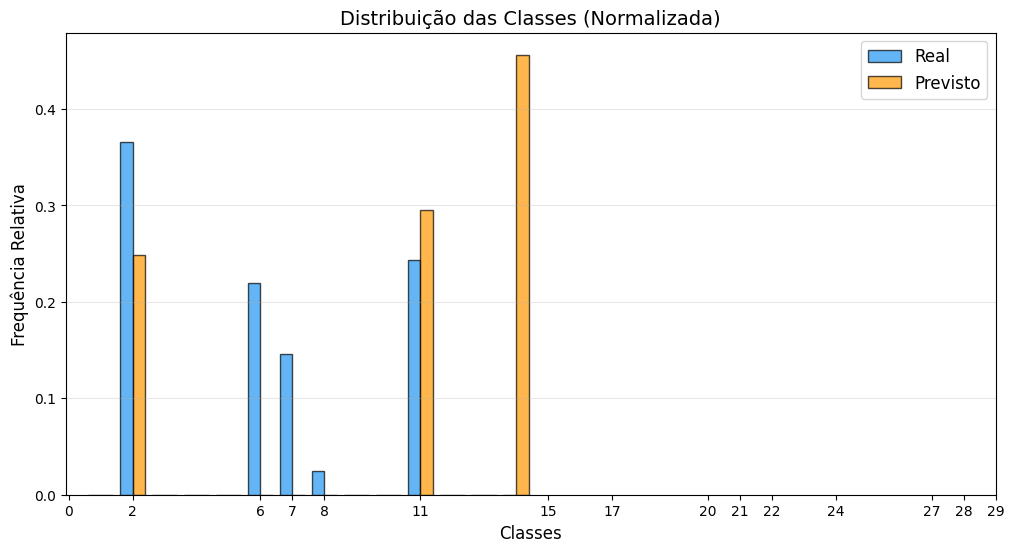

In [85]:
plot_classifier(y_best_ansatz, y_pred_ada_clf_backward, "Ada Boost Classifier - Backward Feature Selection")

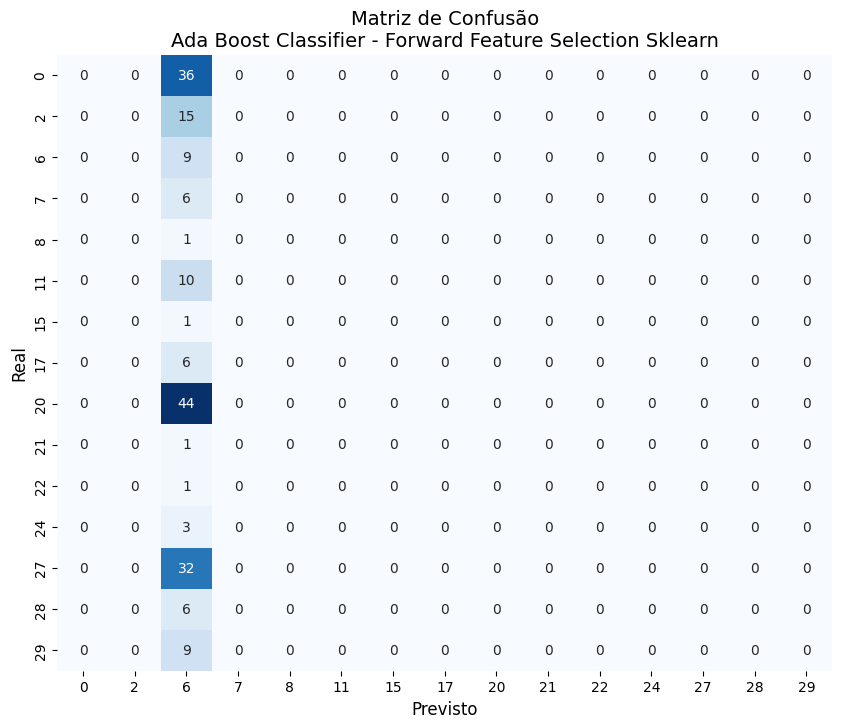

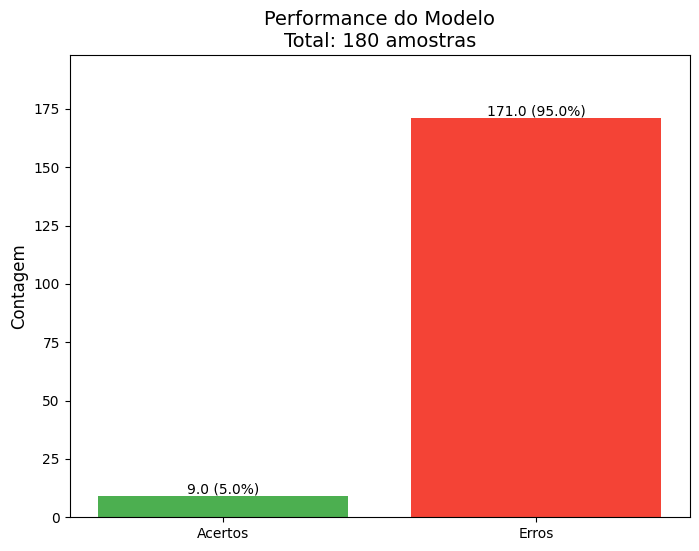

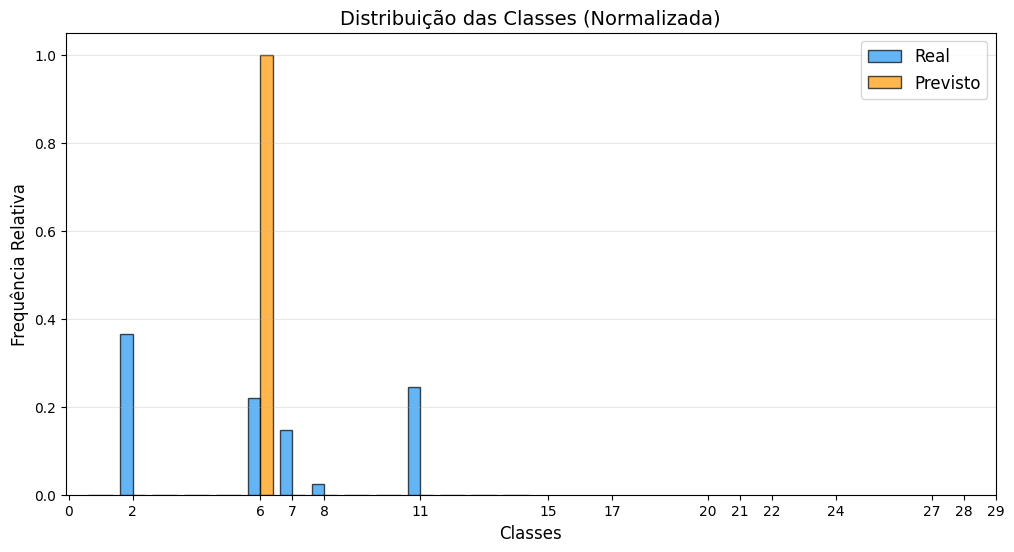

In [89]:
# plot adaboost classifier foward sklearn
plot_classifier(y_best_ansatz, y_pred_ada_clf_forward_sk, "Ada Boost Classifier - Forward Feature Selection Sklearn")

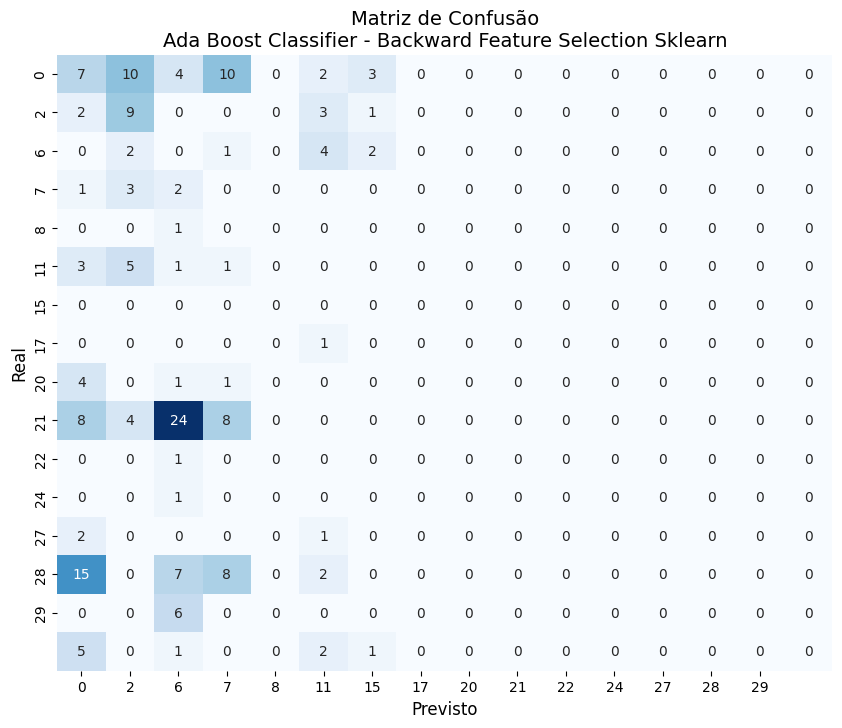

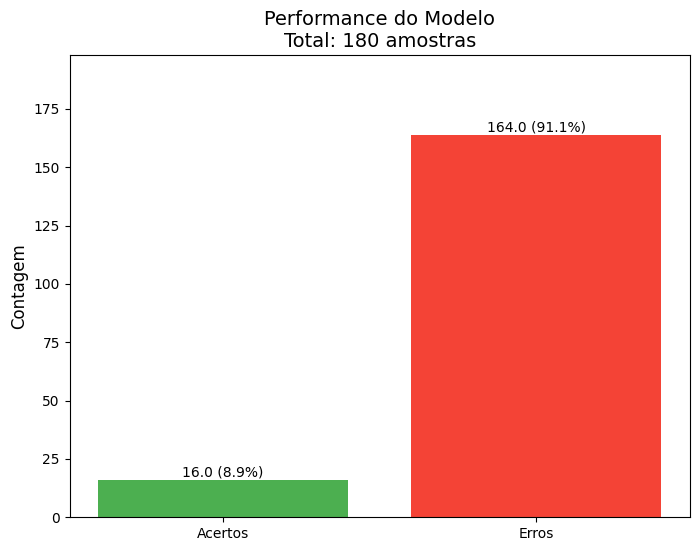

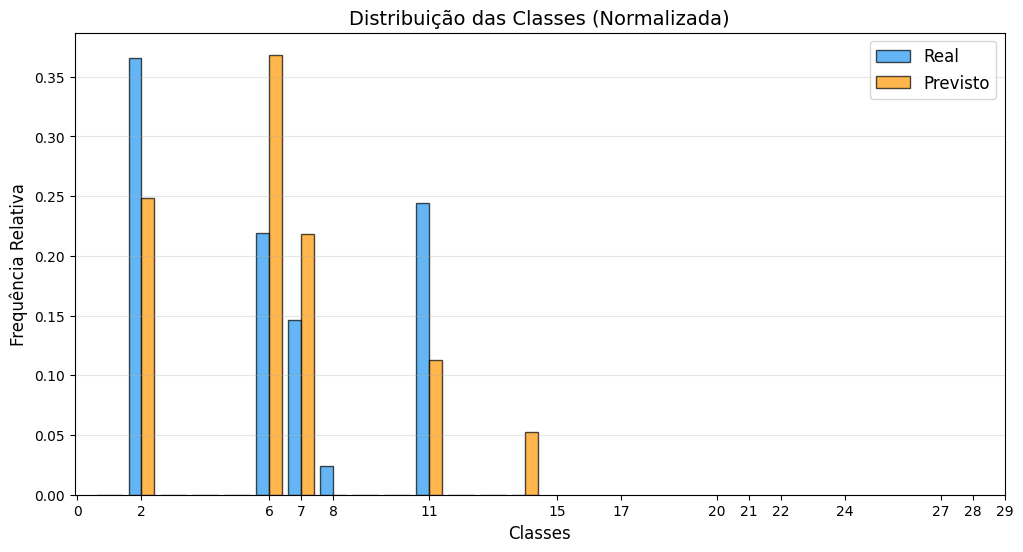

In [90]:
# plot classifier backward sklearn
plot_classifier(y_best_ansatz, y_pred_ada_clf_backward_sk, "Ada Boost Classifier - Backward Feature Selection Sklearn")

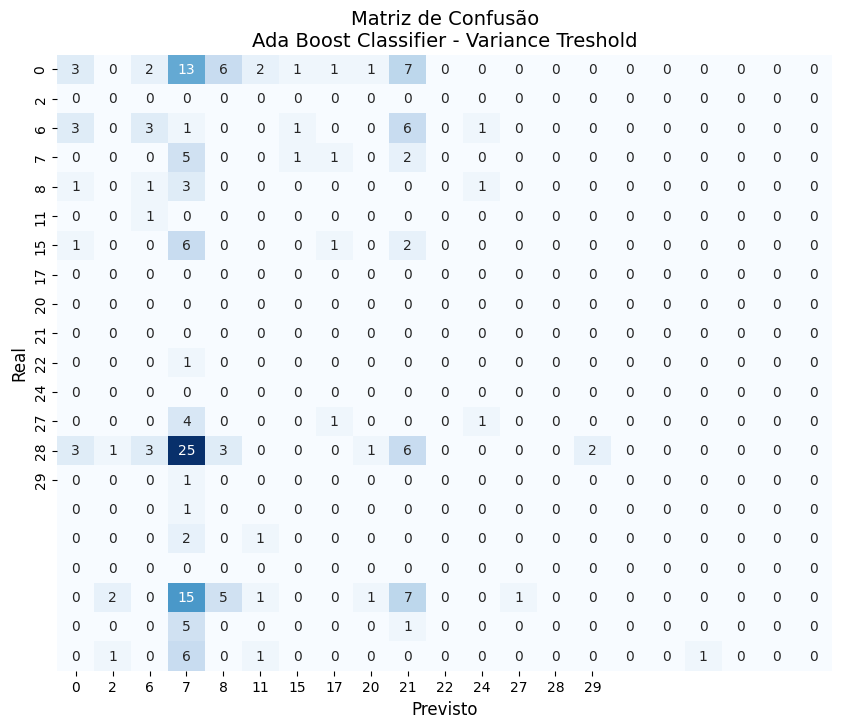

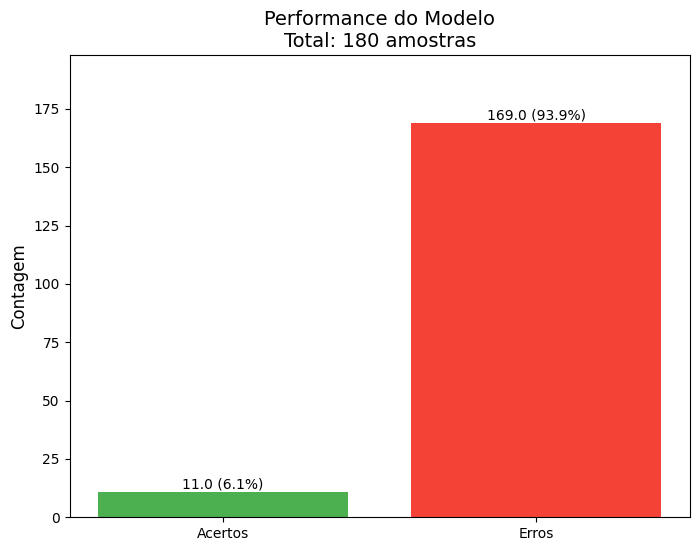

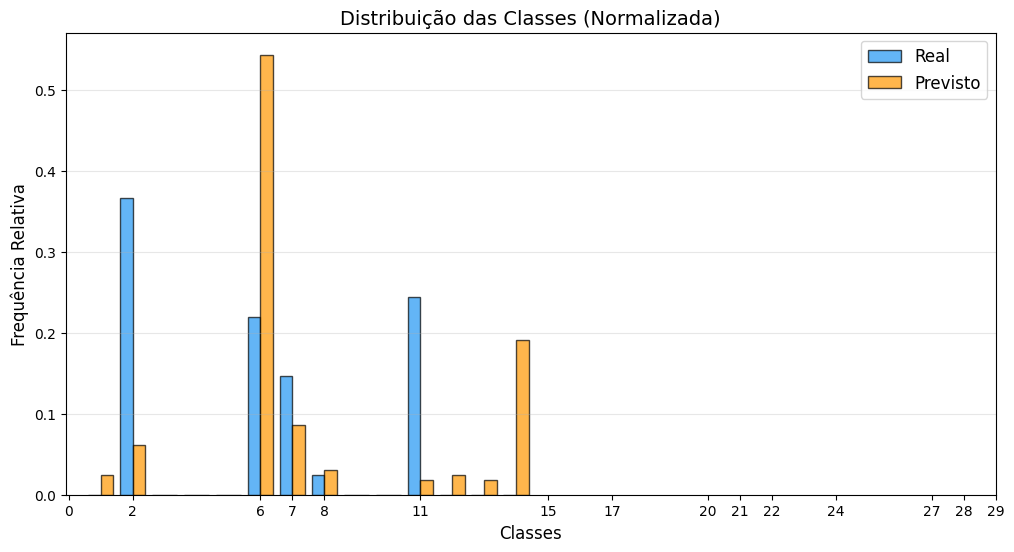

In [91]:
# plot classifier ada boost treshold
plot_classifier(y_best_ansatz, y_pred_ada_clf_treshold, "Ada Boost Classifier - Variance Treshold")

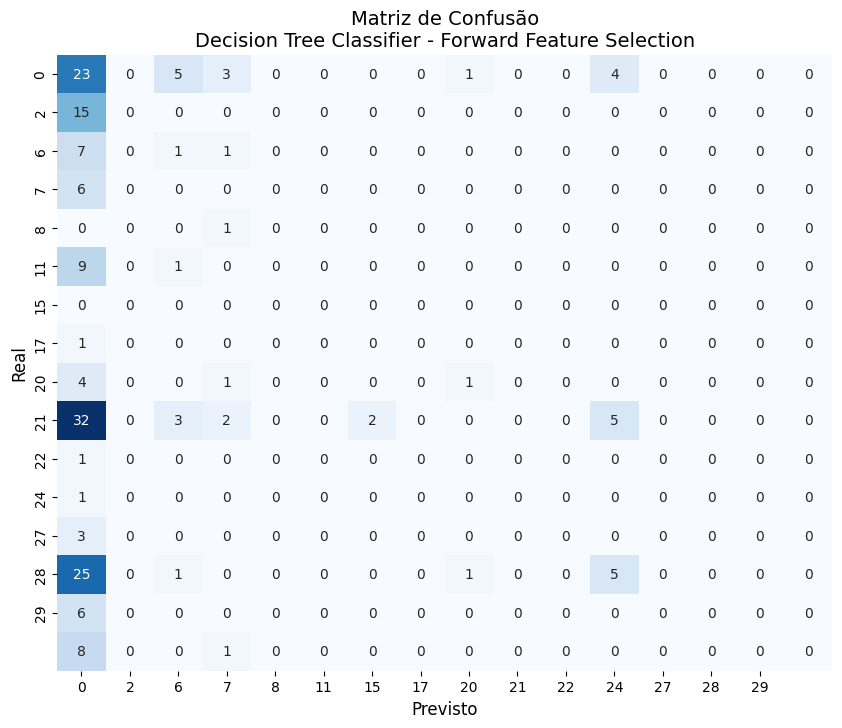

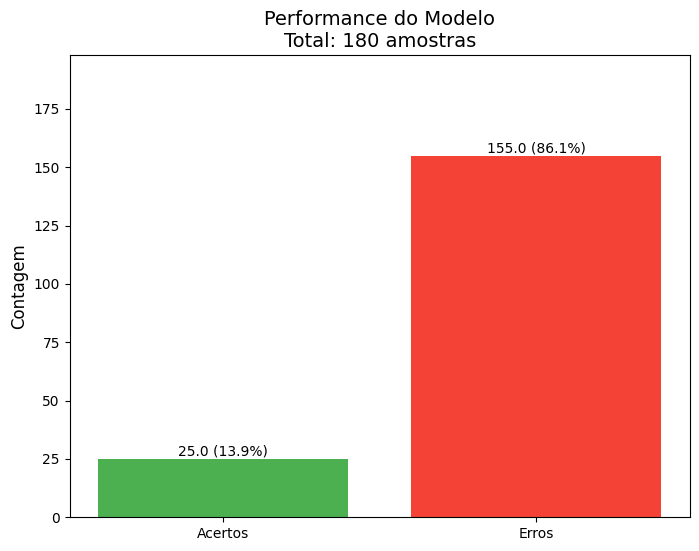

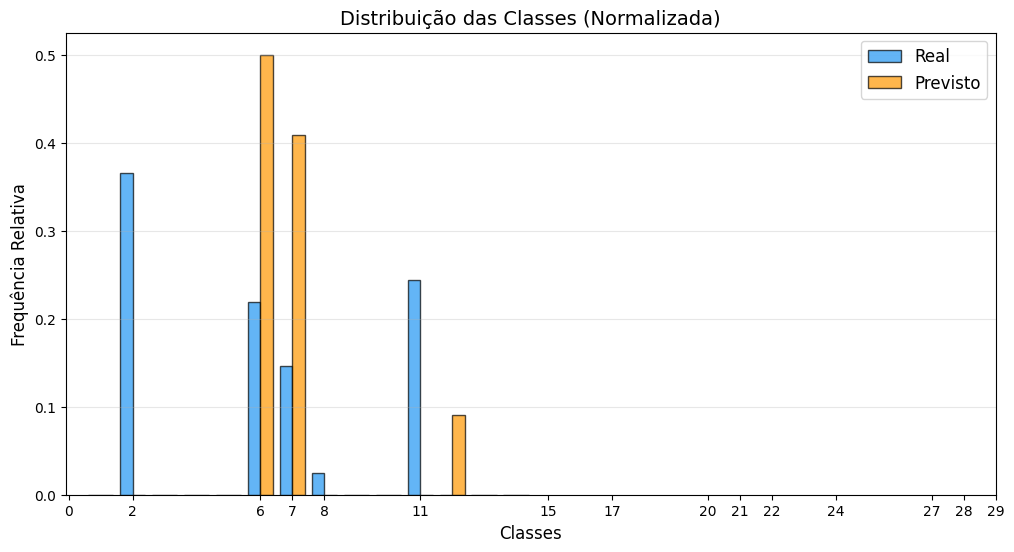

In [92]:
#plot dt classifier forward
plot_classifier(y_best_ansatz, y_pred_dt_clf_forward, "Decision Tree Classifier - Forward Feature Selection")

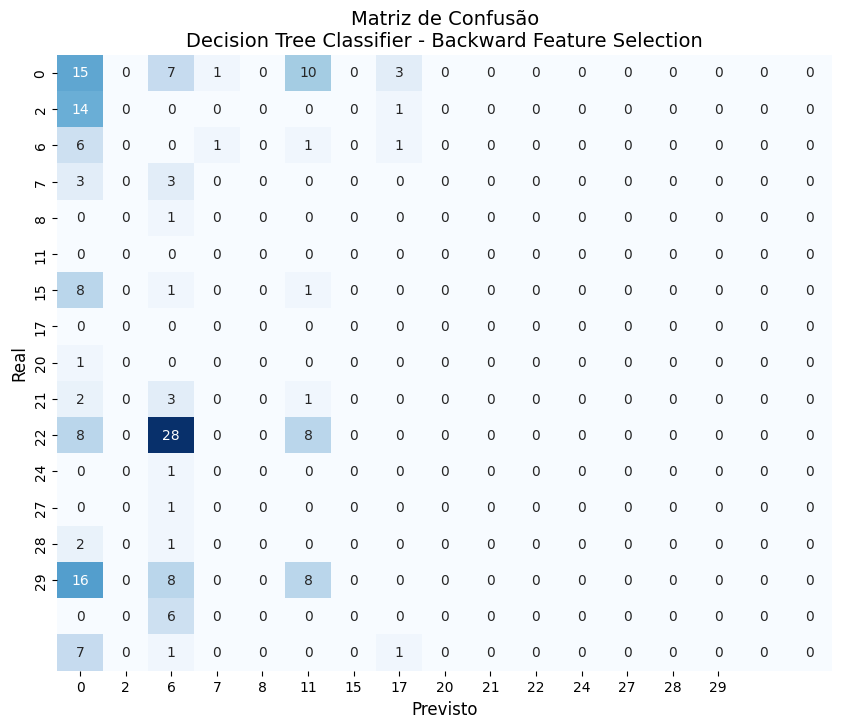

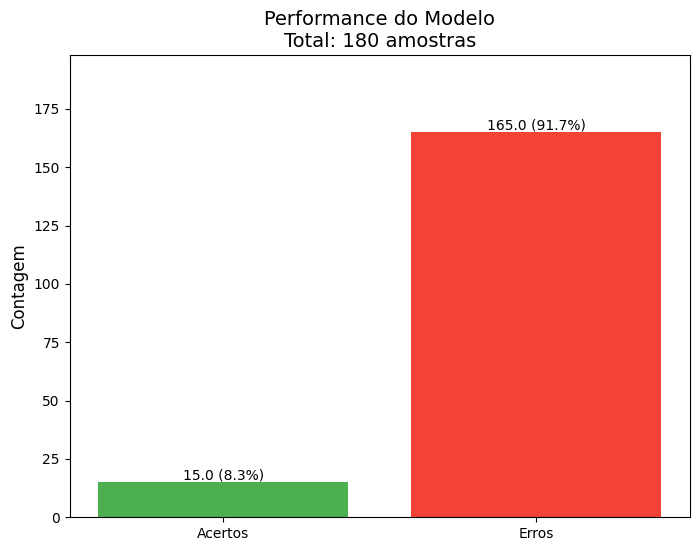

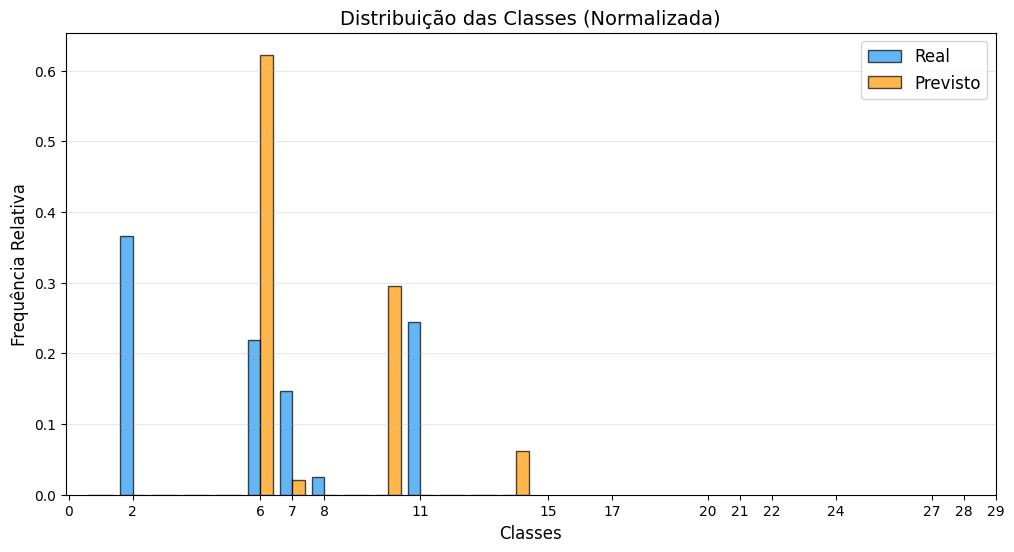

In [93]:
#plot dt classifier backward
plot_classifier(y_best_ansatz, y_pred_dt_clf_backward, "Decision Tree Classifier - Backward Feature Selection")

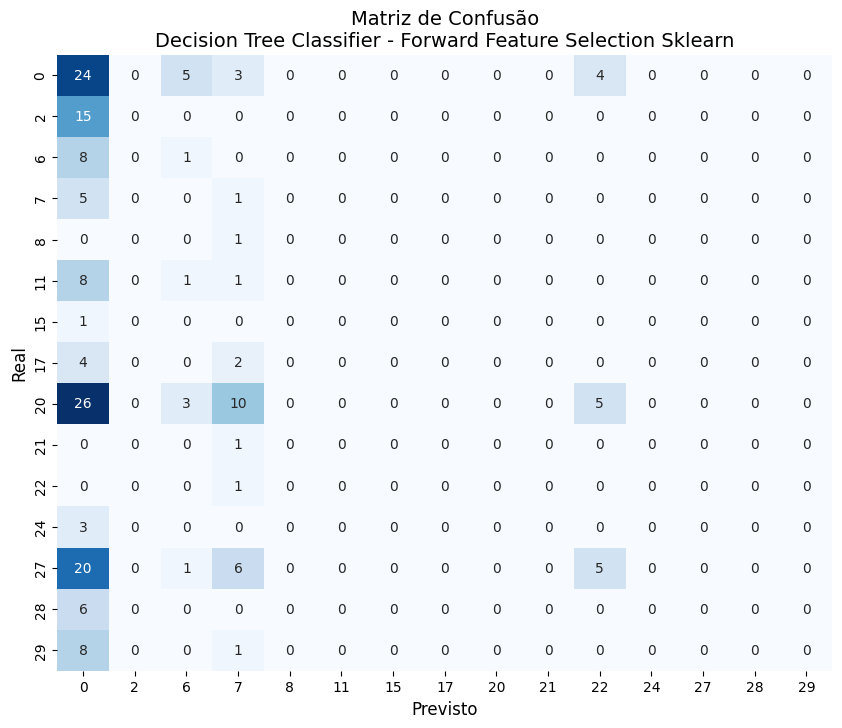

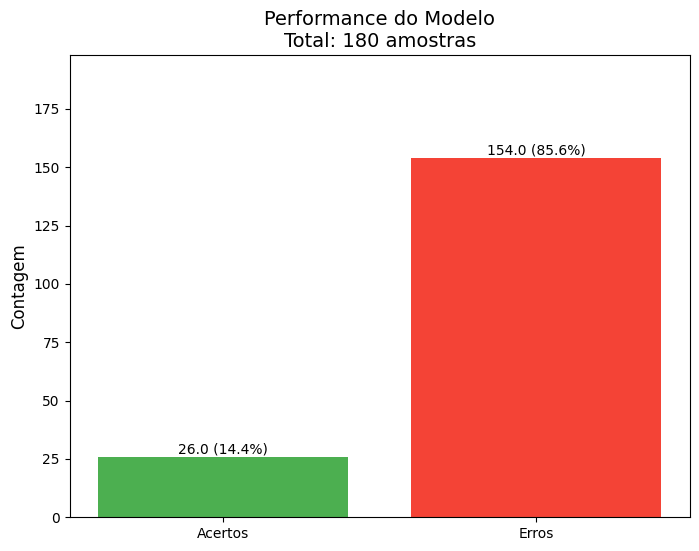

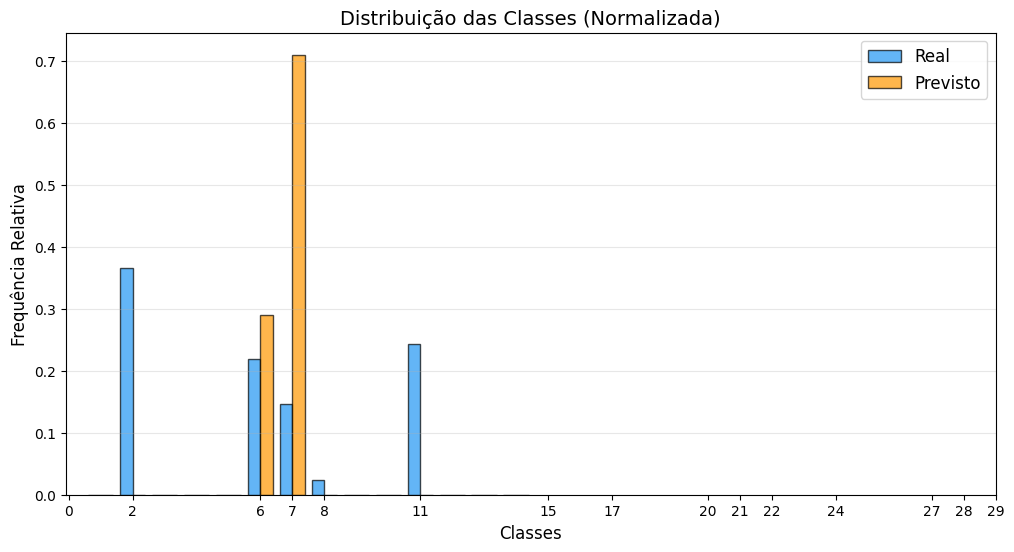

In [94]:
#plot dt classifier forward feature selection sklearn
plot_classifier(y_best_ansatz, y_pred_dt_clf_forward_sk, "Decision Tree Classifier - Forward Feature Selection Sklearn")

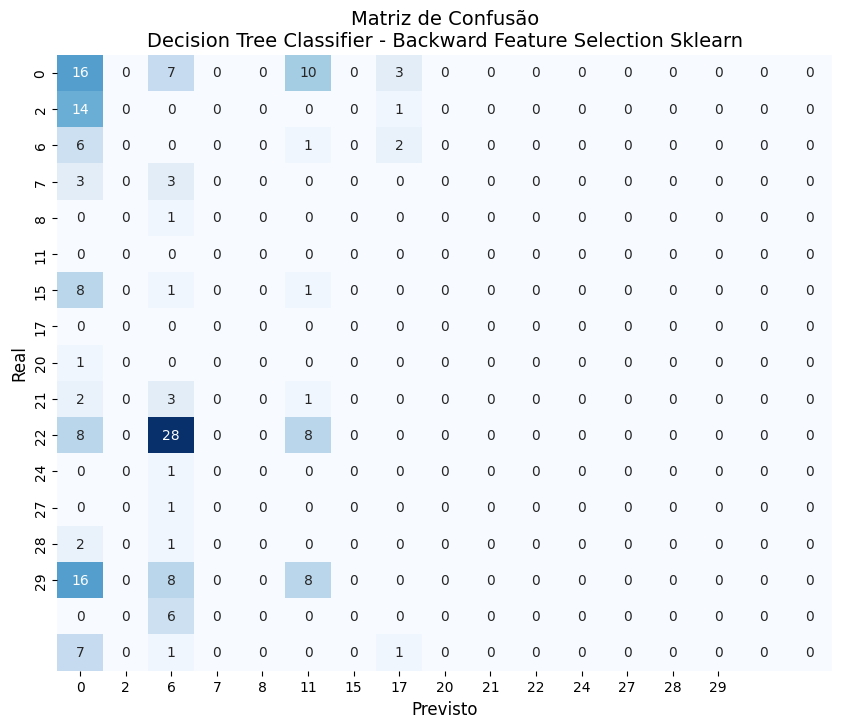

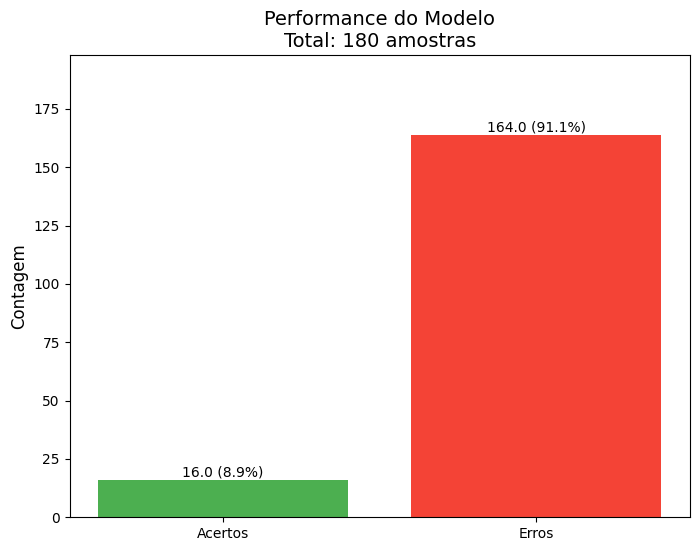

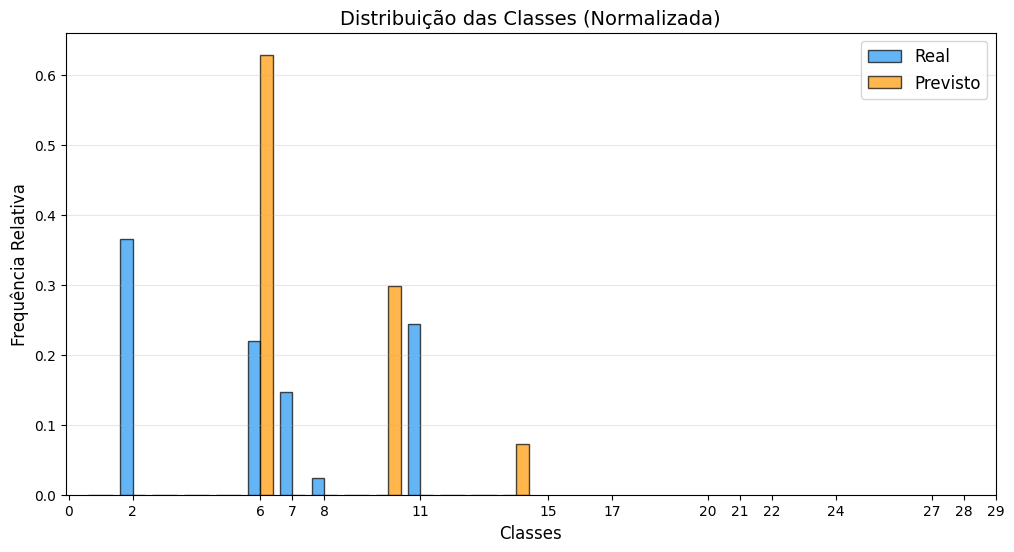

In [95]:
#plot dt classifier backward sklearn
plot_classifier(y_best_ansatz, y_pred_dt_clf_backward_sk, "Decision Tree Classifier - Backward Feature Selection Sklearn")

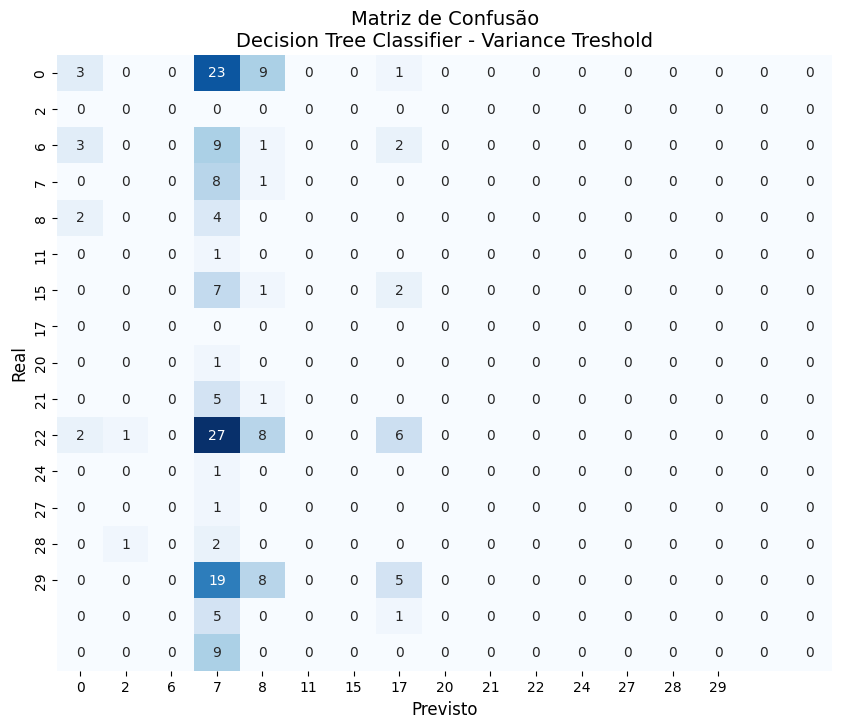

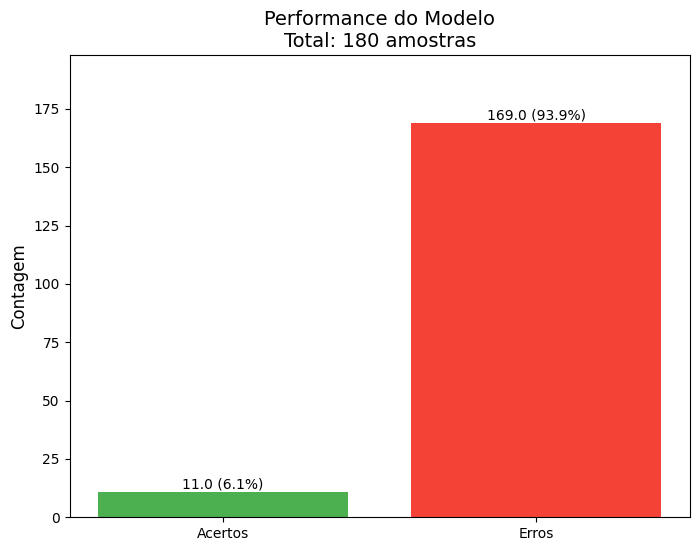

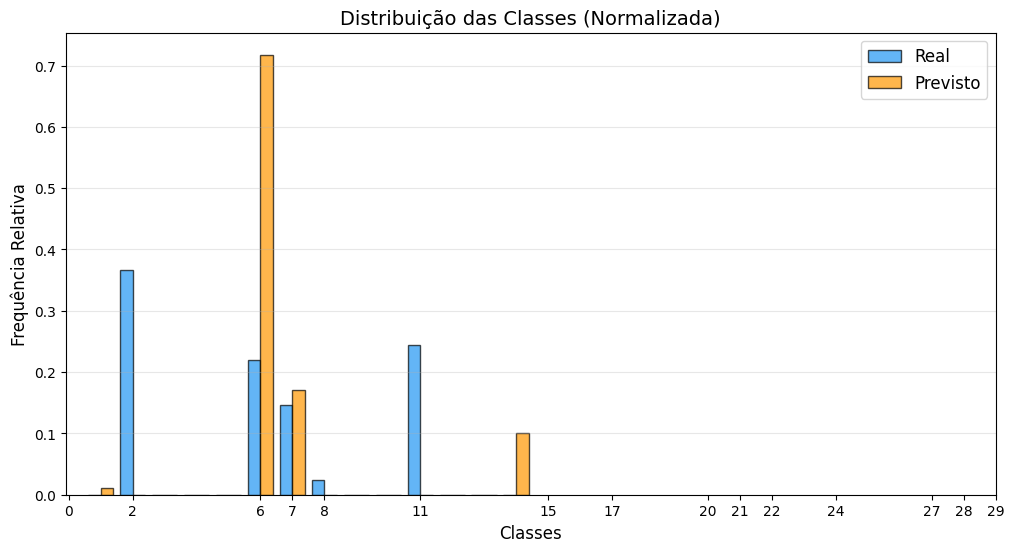

In [96]:
# plot dt treshold
plot_classifier(y_best_ansatz, y_pred_dt_clf_treshold, "Decision Tree Classifier - Variance Treshold")

#### PLOT DOS RESULTADOS PARA REGRESSÃO

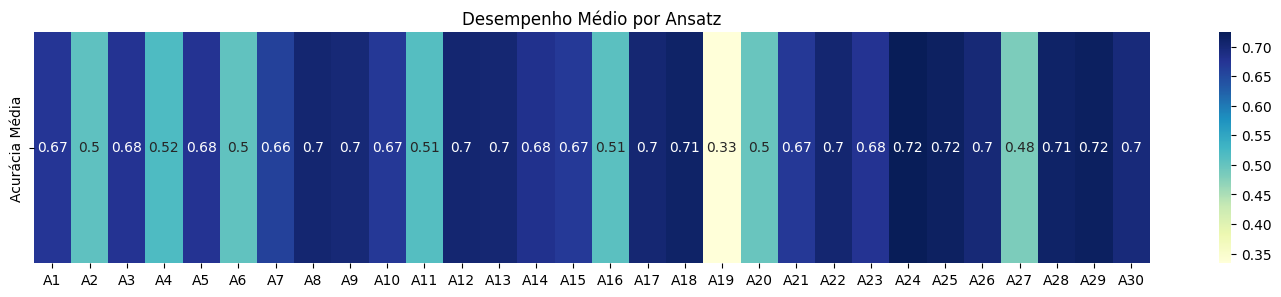

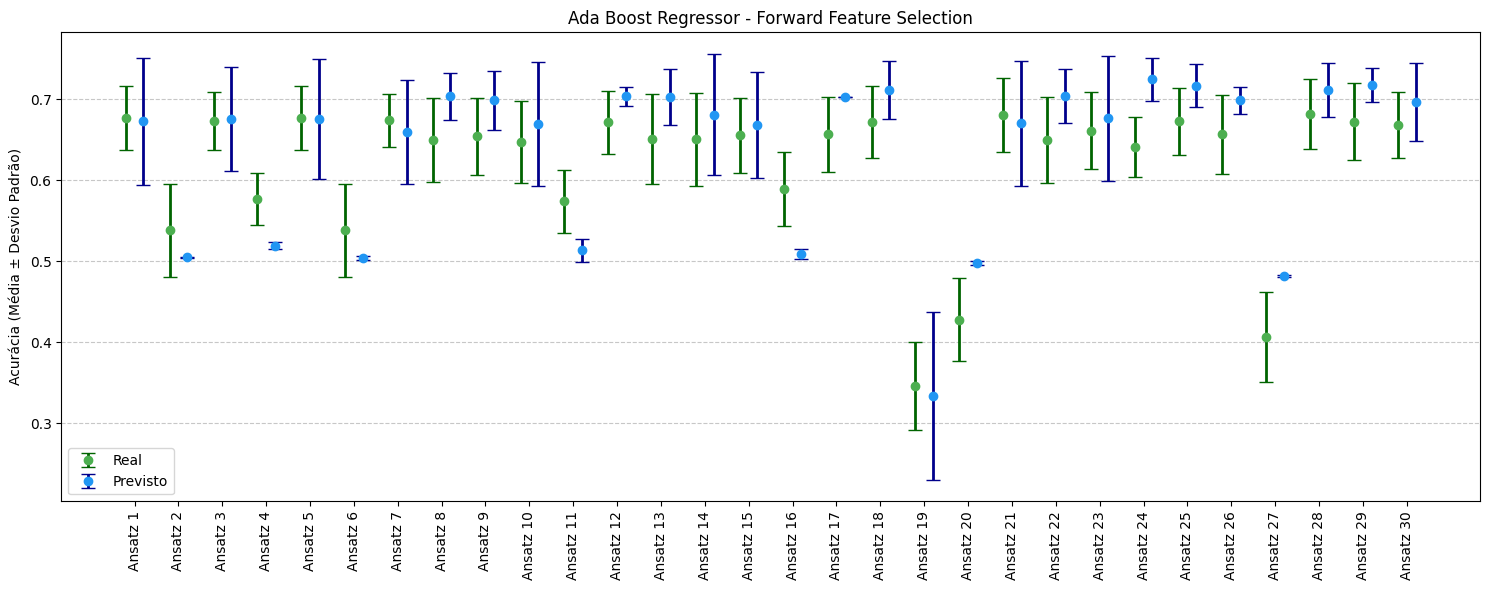

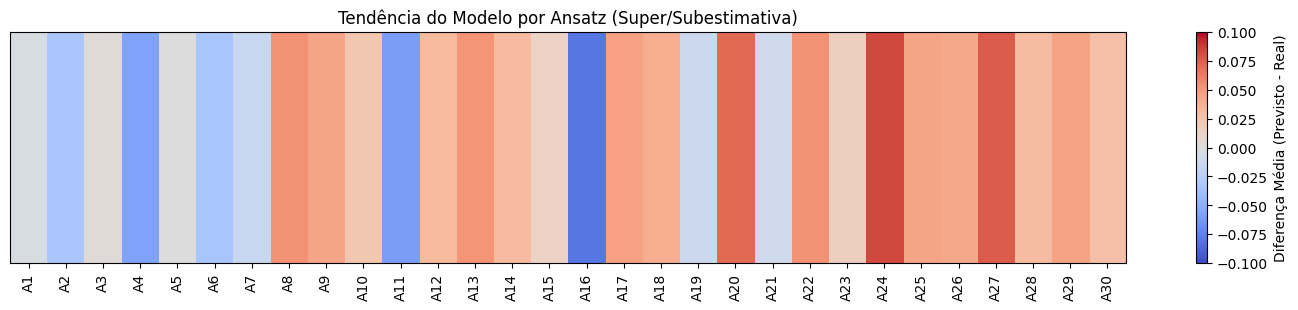

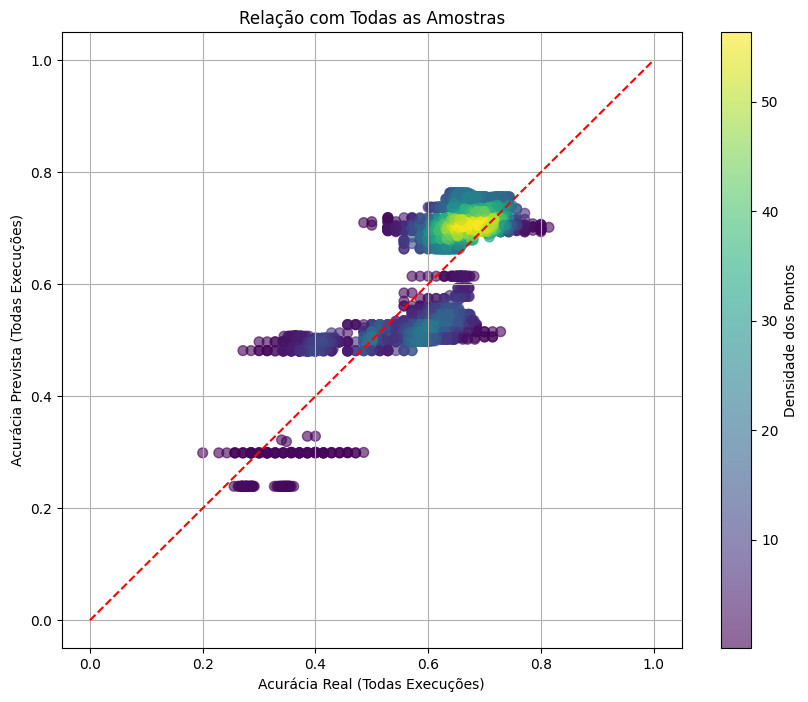

In [97]:
# plot ada regressor forward
plot_regressor(y, y_pred_ada_rgs_forward, "Ada Boost Regressor - Forward Feature Selection")

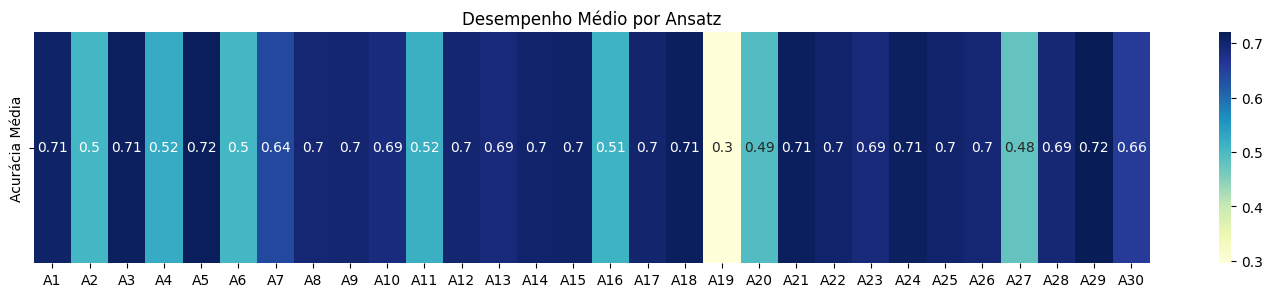

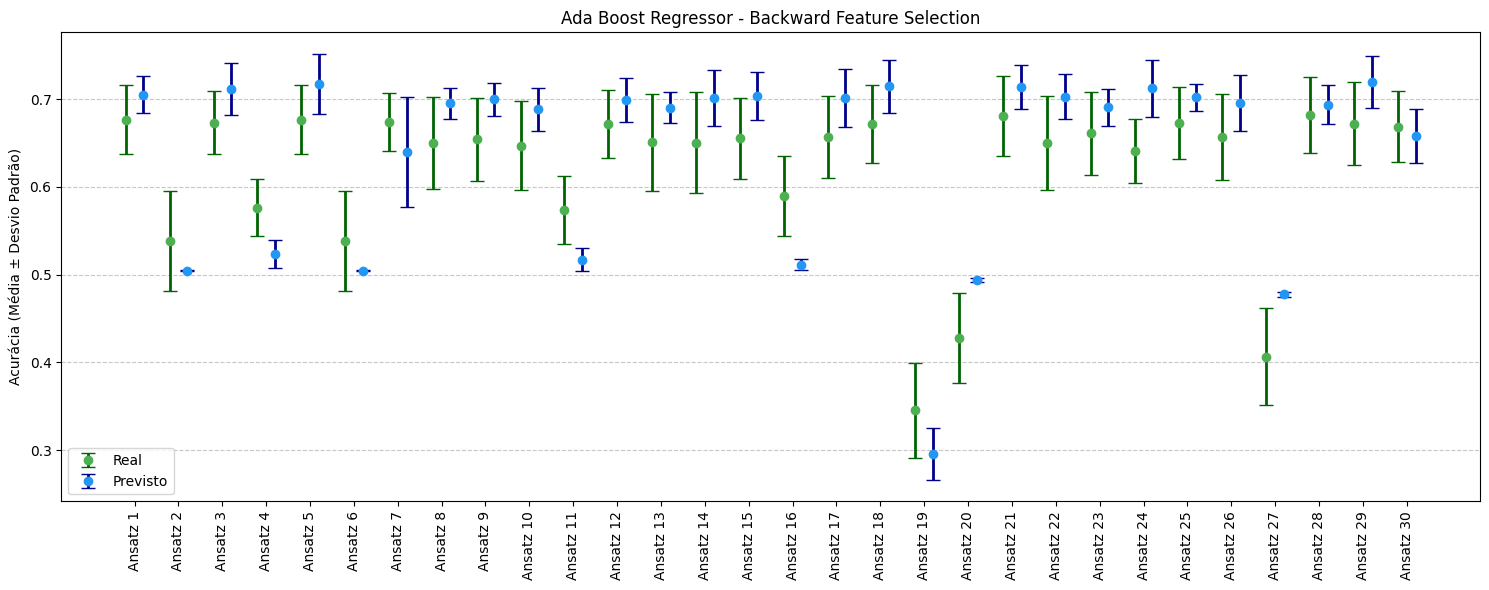

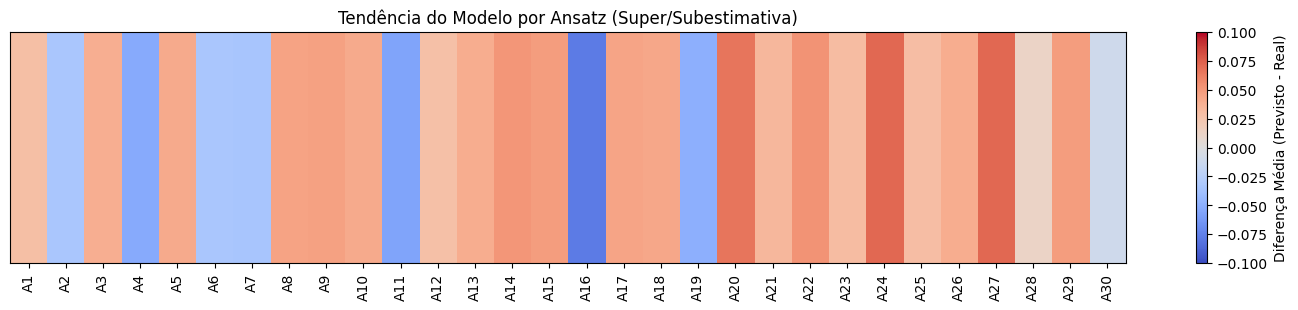

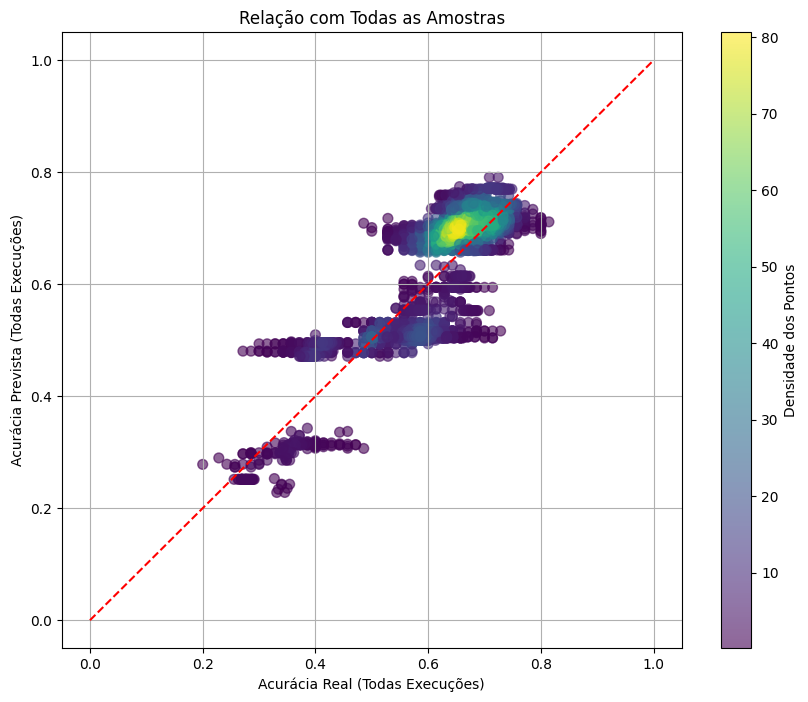

In [98]:
#plot ada regressor backward
plot_regressor(y, y_pred_ada_rgs_backward, "Ada Boost Regressor - Backward Feature Selection")

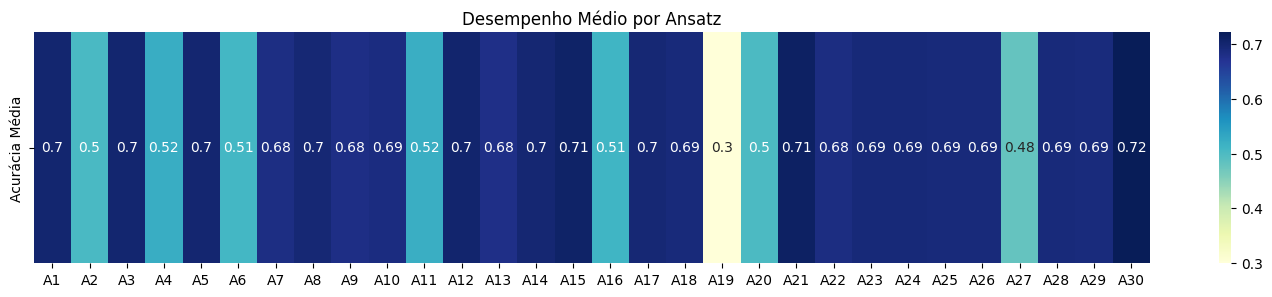

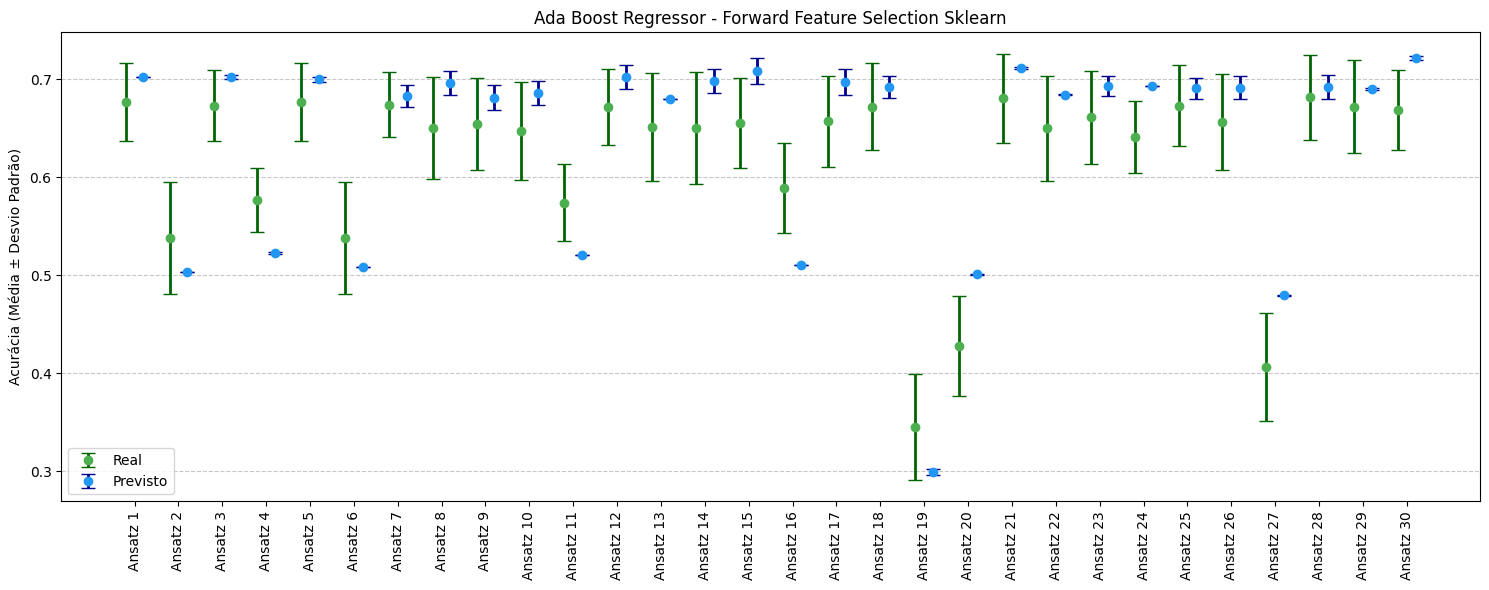

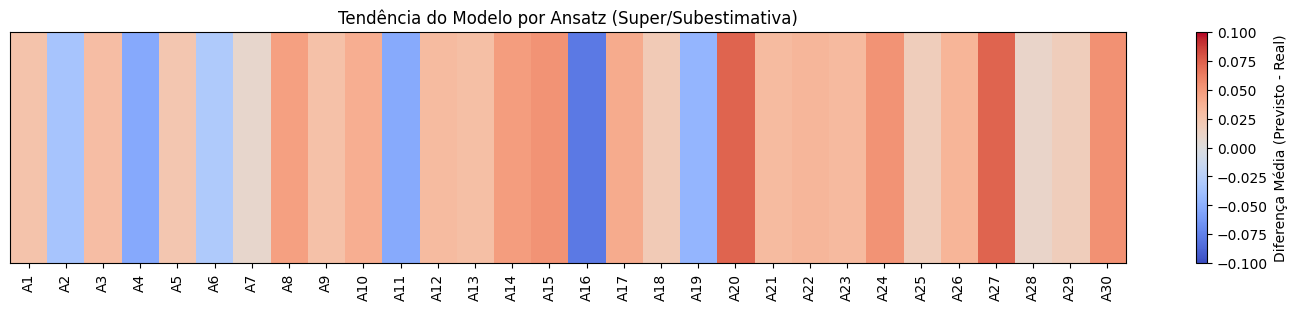

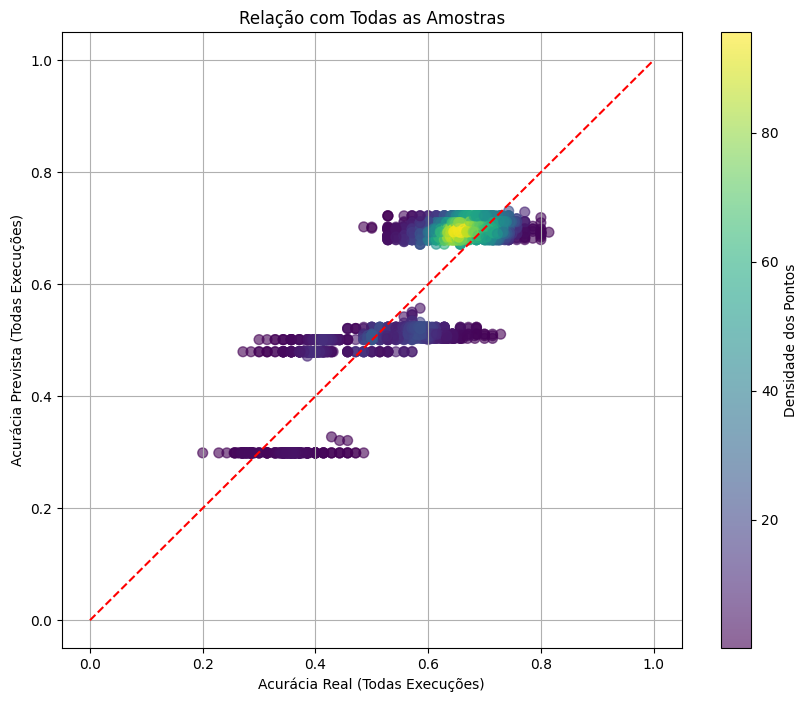

In [99]:
#plot ada regressor forward sklearn
plot_regressor(y, y_pred_ada_rgs_forward_sk, "Ada Boost Regressor - Forward Feature Selection Sklearn")

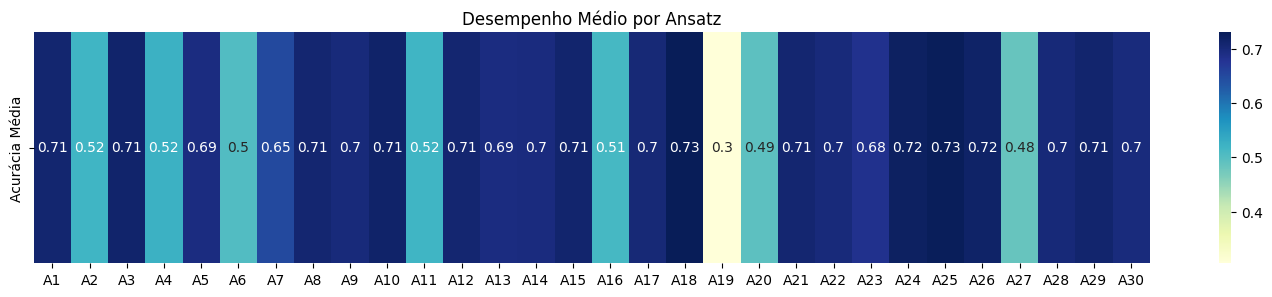

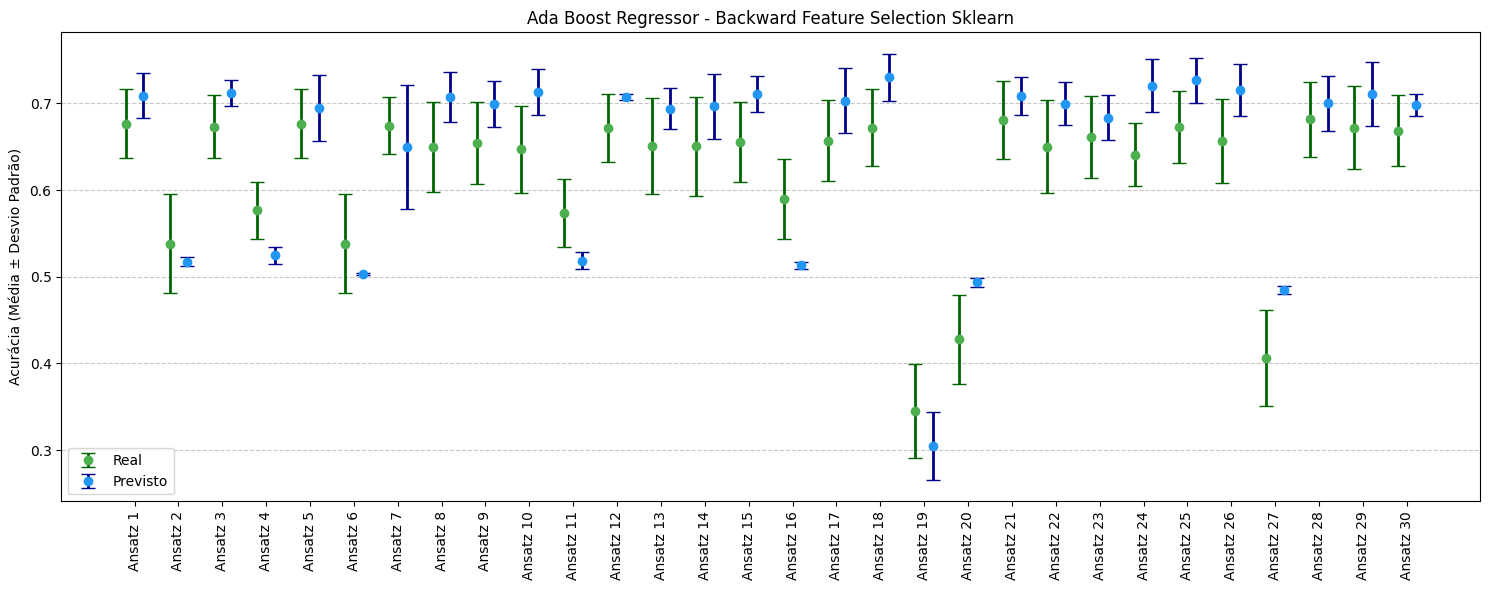

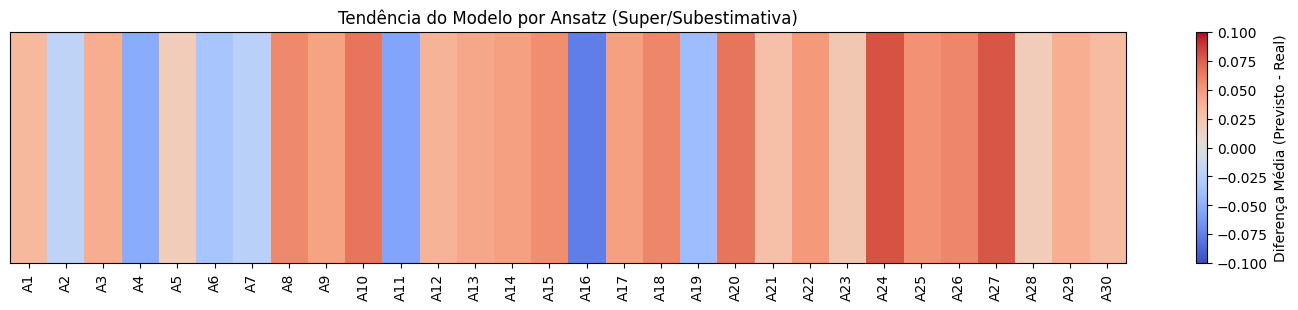

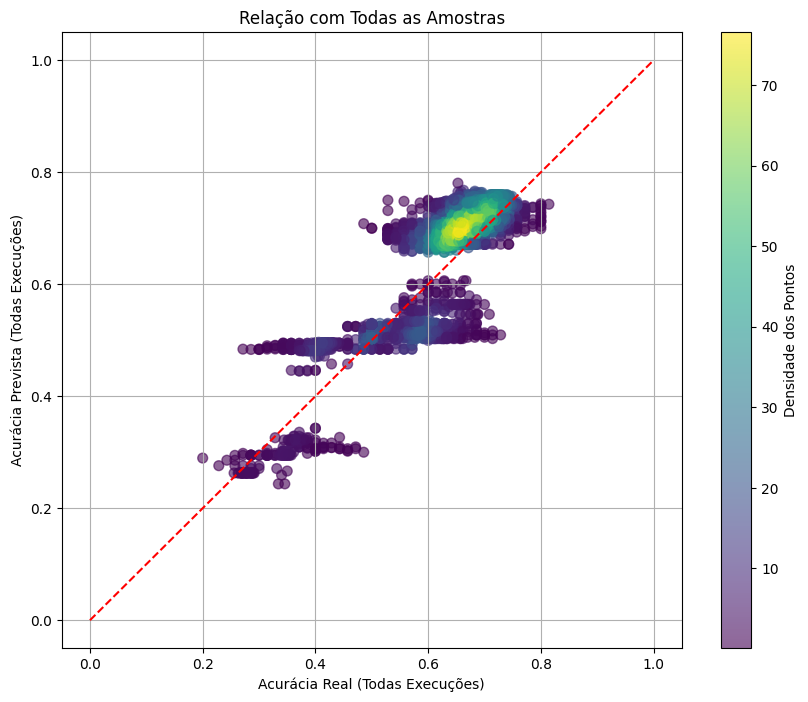

In [100]:
#plot ada regressor backward sklearn
plot_regressor(y, y_pred_ada_rgs_backward_sk, "Ada Boost Regressor - Backward Feature Selection Sklearn")

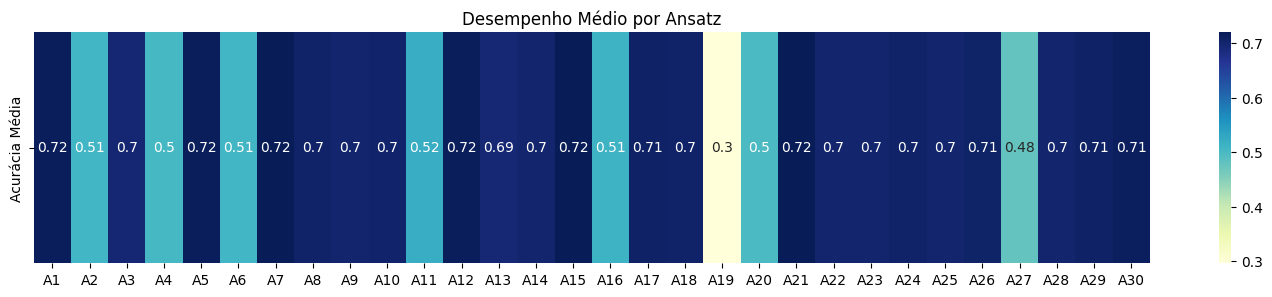

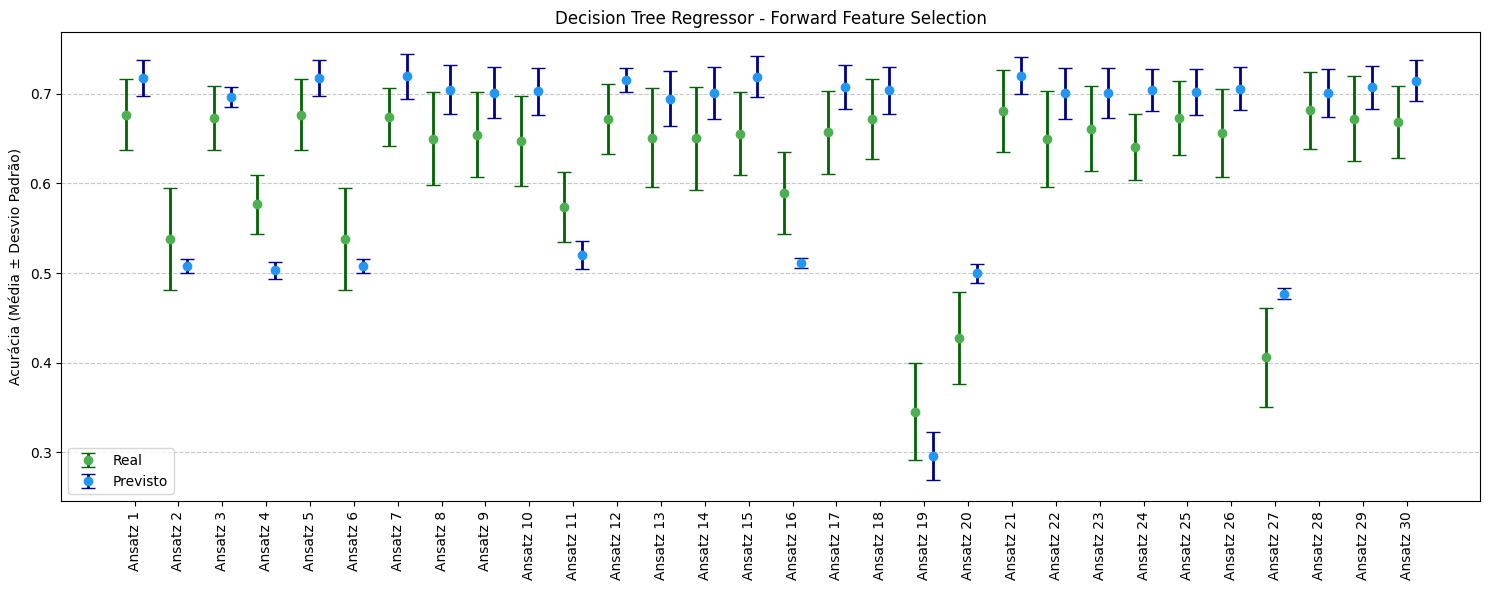

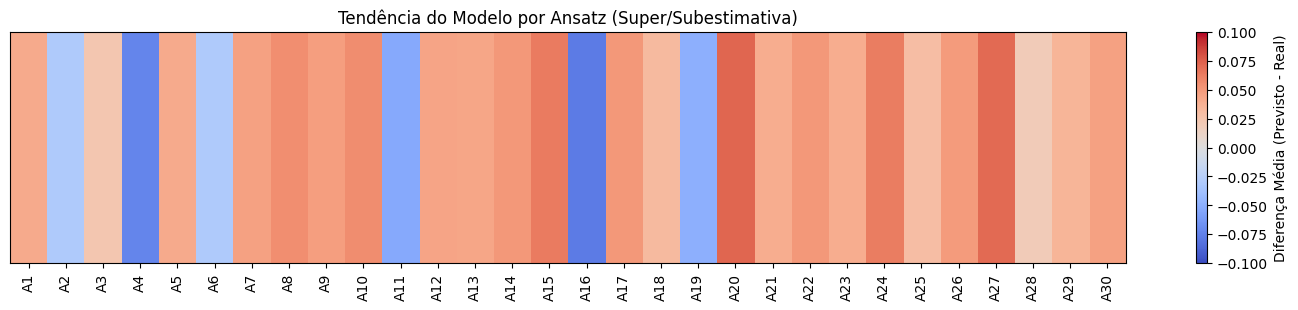

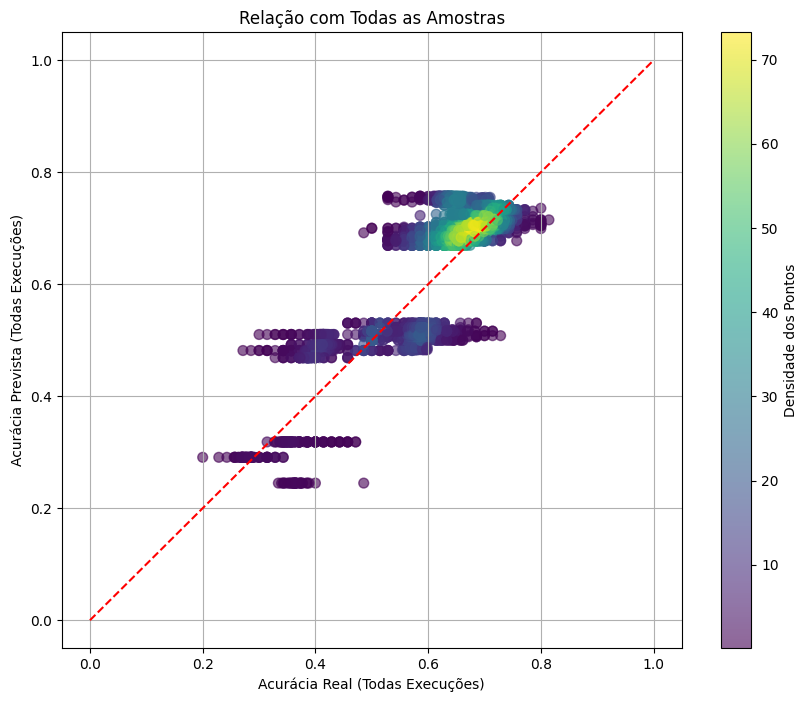

In [101]:
# plot dt regressor forward
plot_regressor(y, y_pred_dt_rgs_forward, "Decision Tree Regressor - Forward Feature Selection")

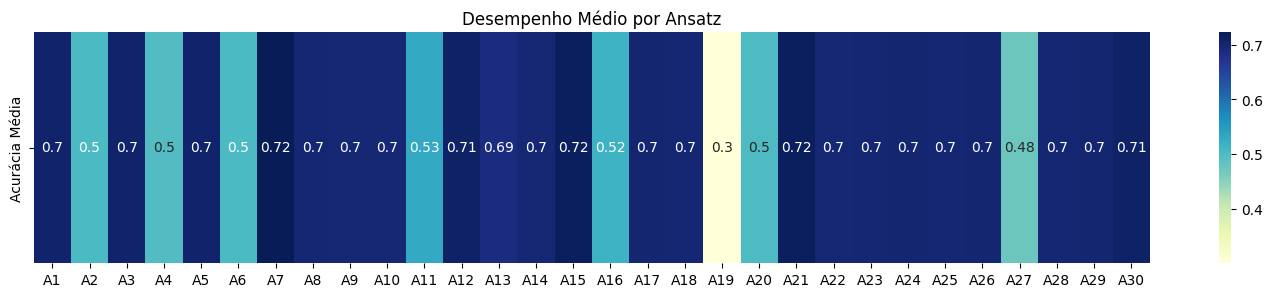

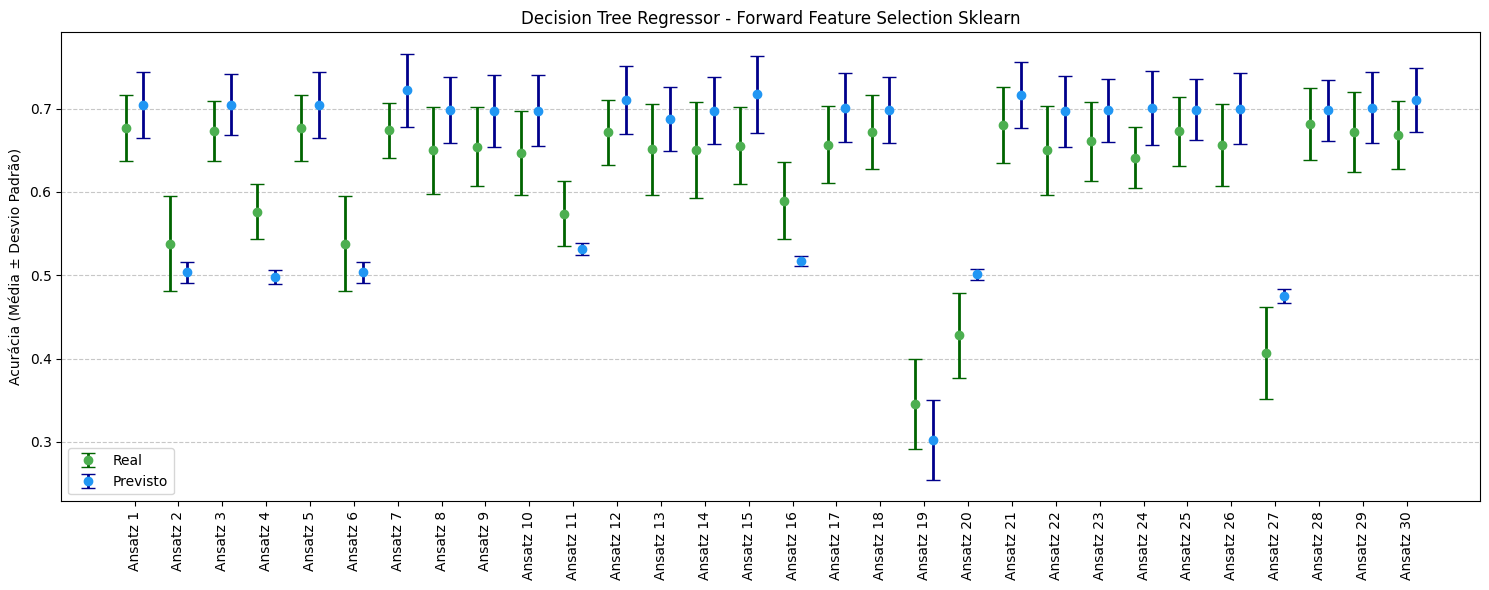

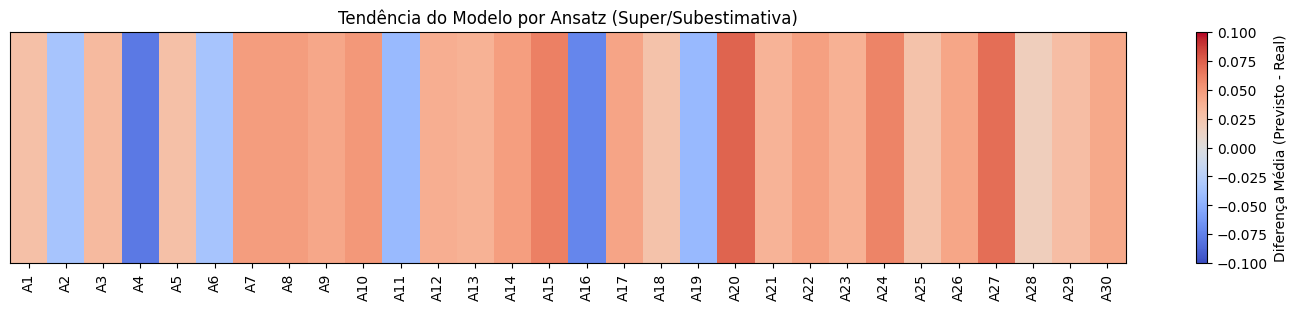

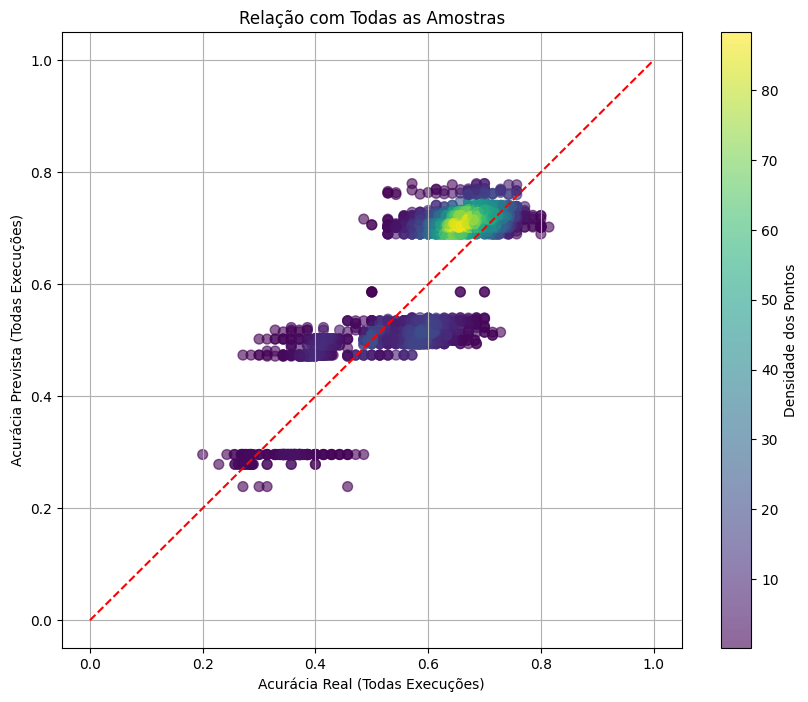

In [102]:
# plot dt regressor forward sklearn
plot_regressor(y, y_pred_dt_rgs_forward_sk, "Decision Tree Regressor - Forward Feature Selection Sklearn")

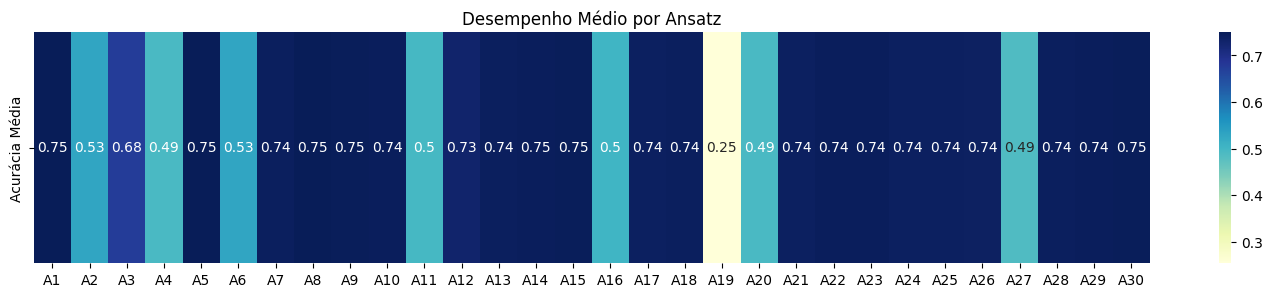

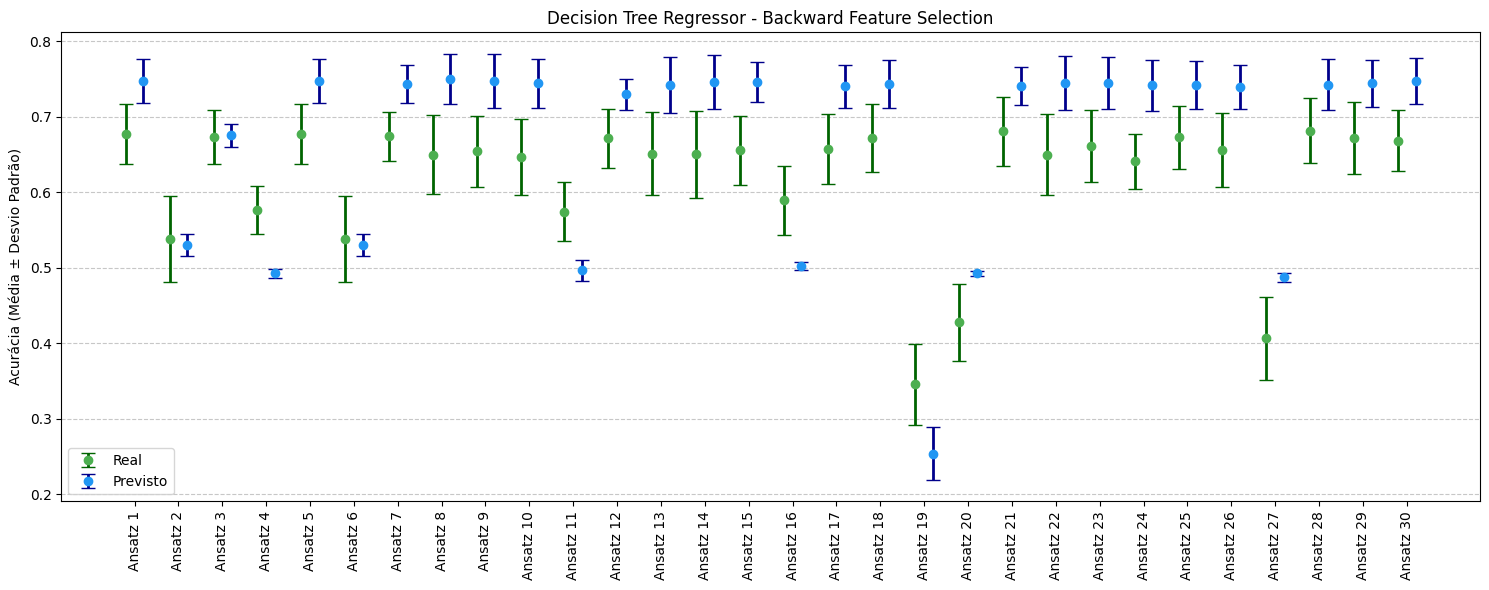

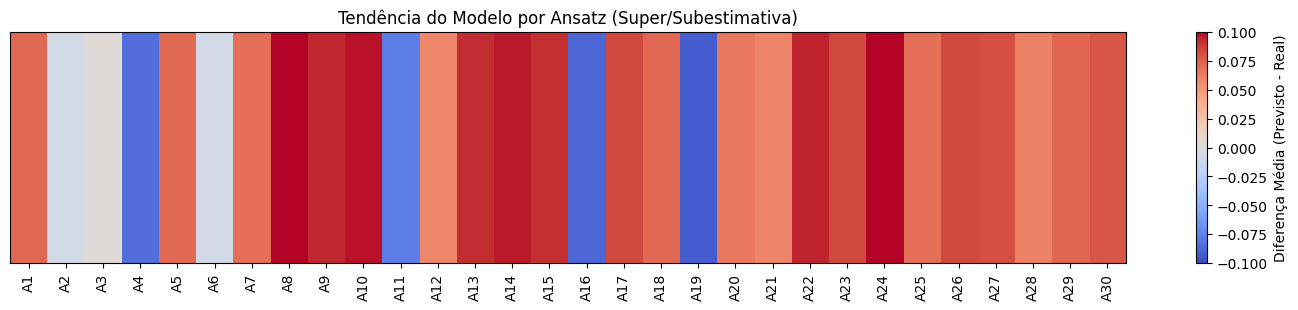

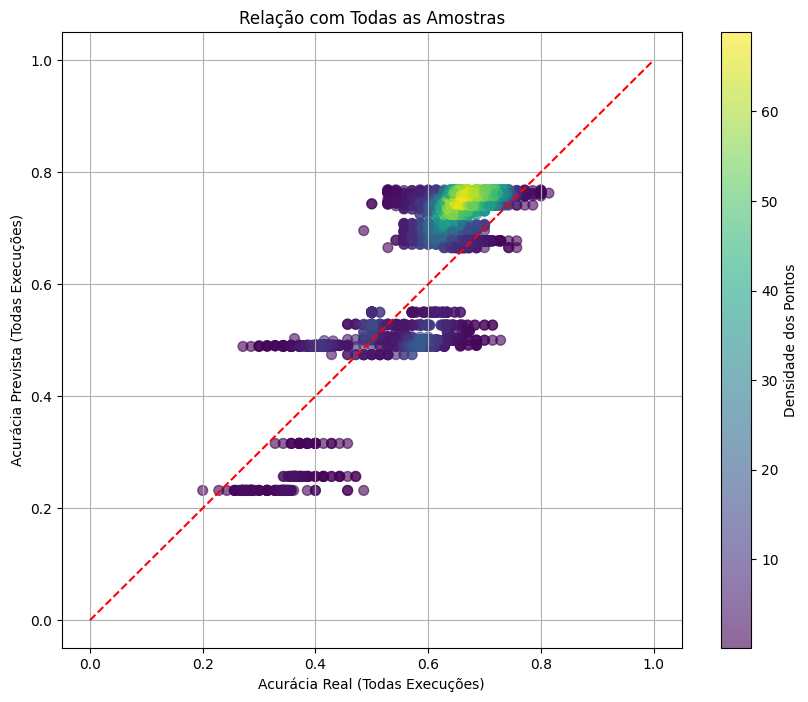

In [103]:
# plot dt regressor bakward
plot_regressor(y, y_pred_dt_rgs_backward, "Decision Tree Regressor - Backward Feature Selection")

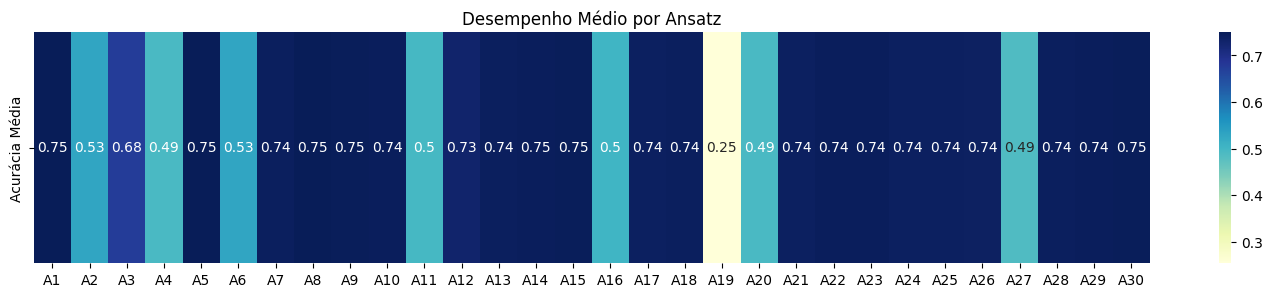

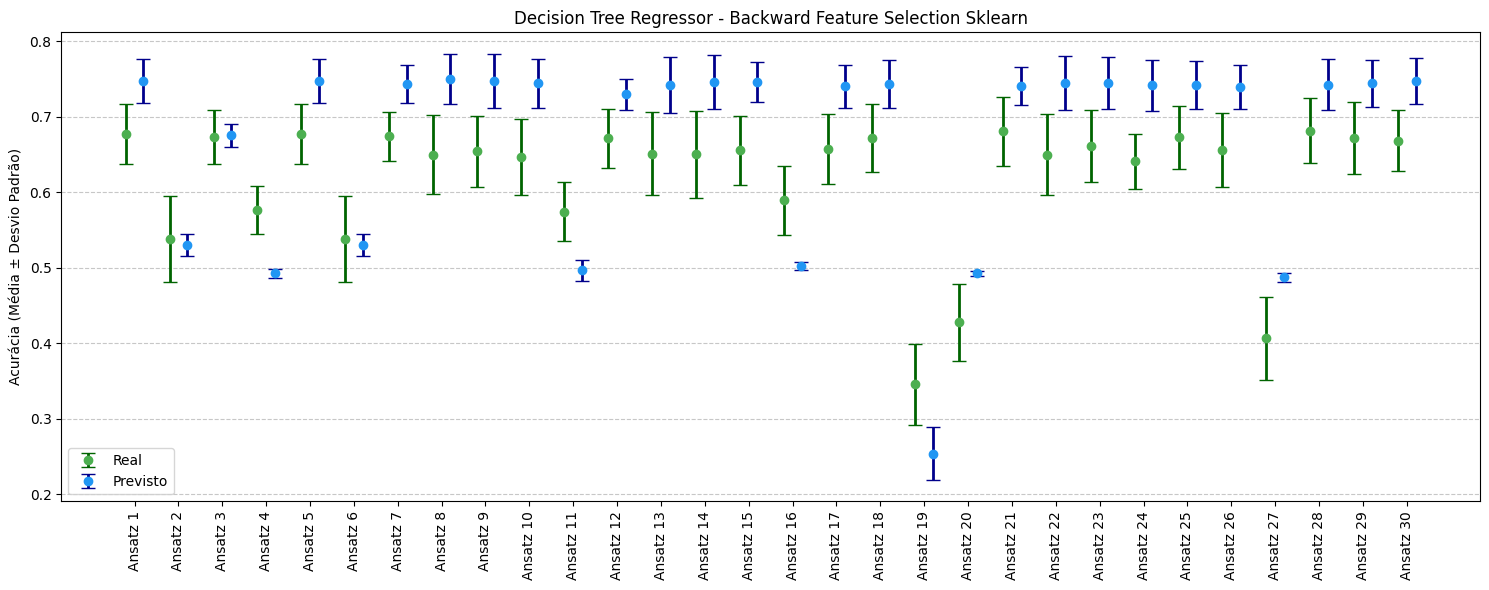

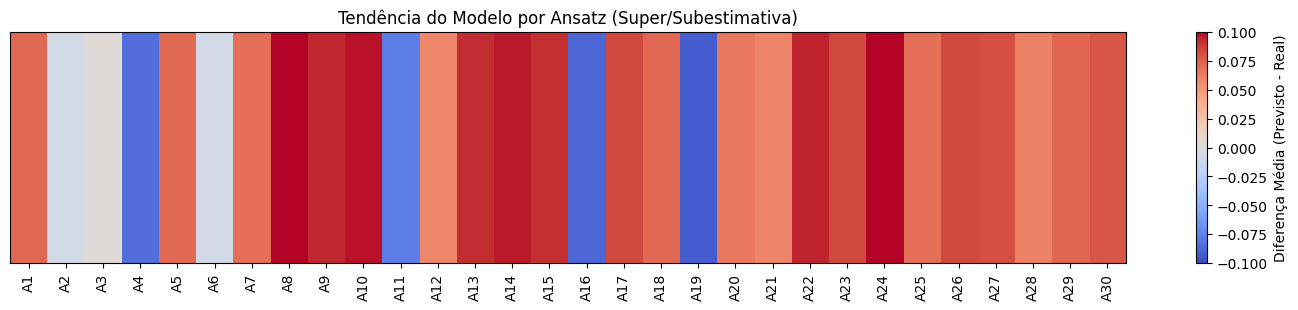

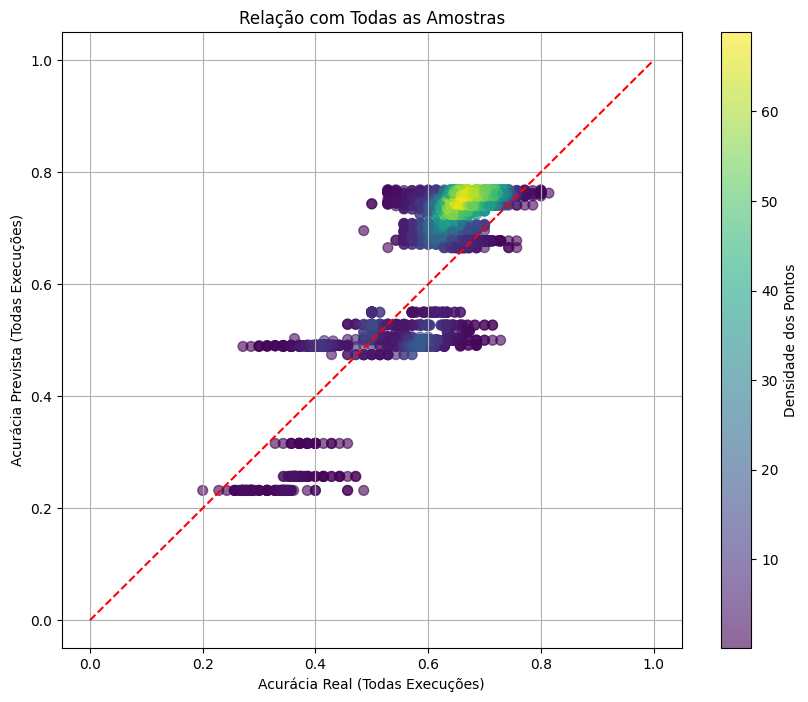

In [104]:
# plot dt regressor backward sklearn
plot_regressor(y, y_pred_dt_rgs_backward_sk, "Decision Tree Regressor - Backward Feature Selection Sklearn")

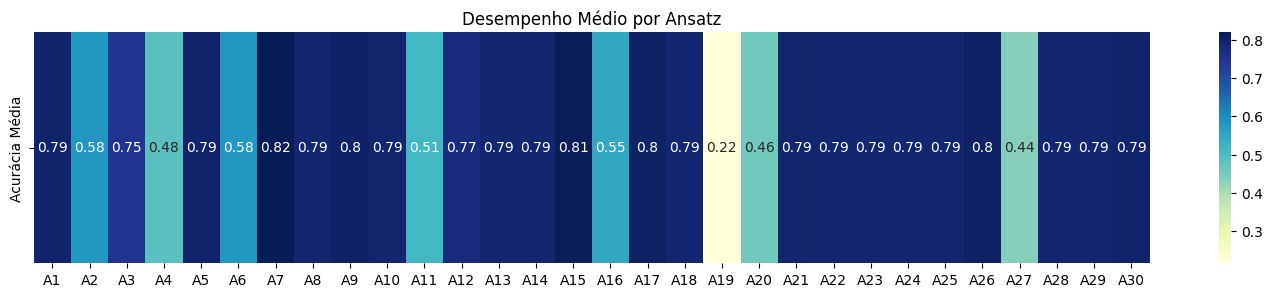

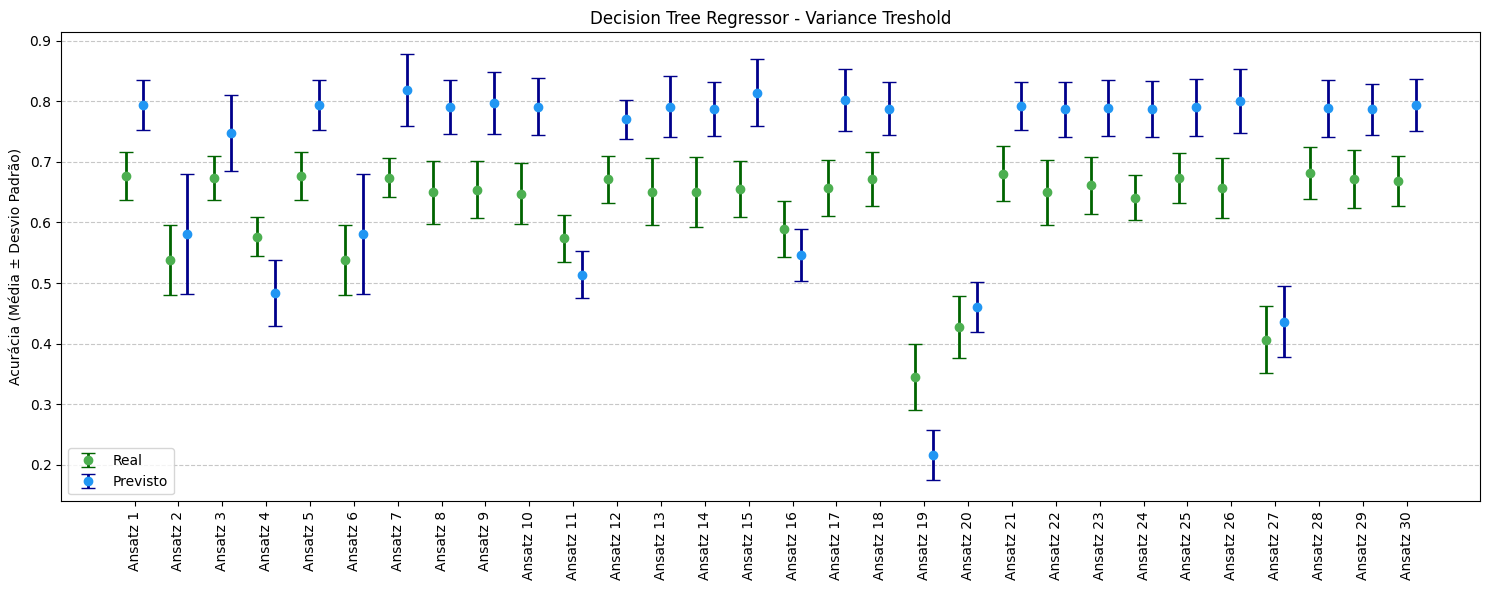

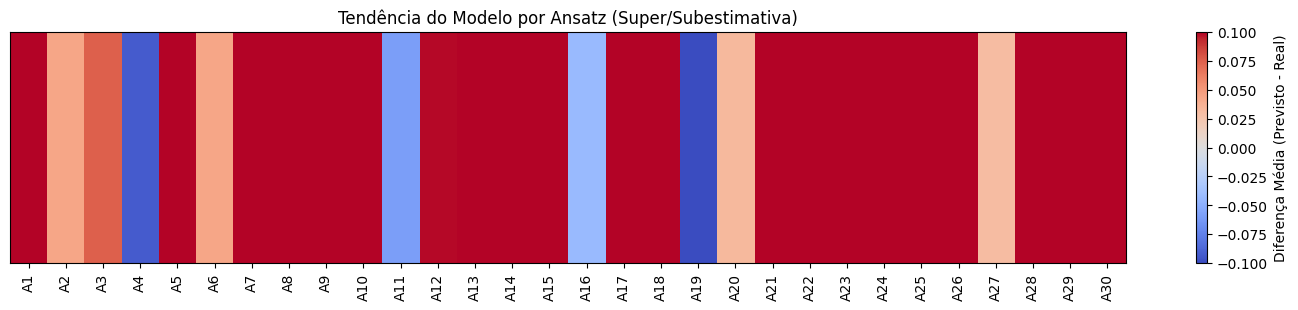

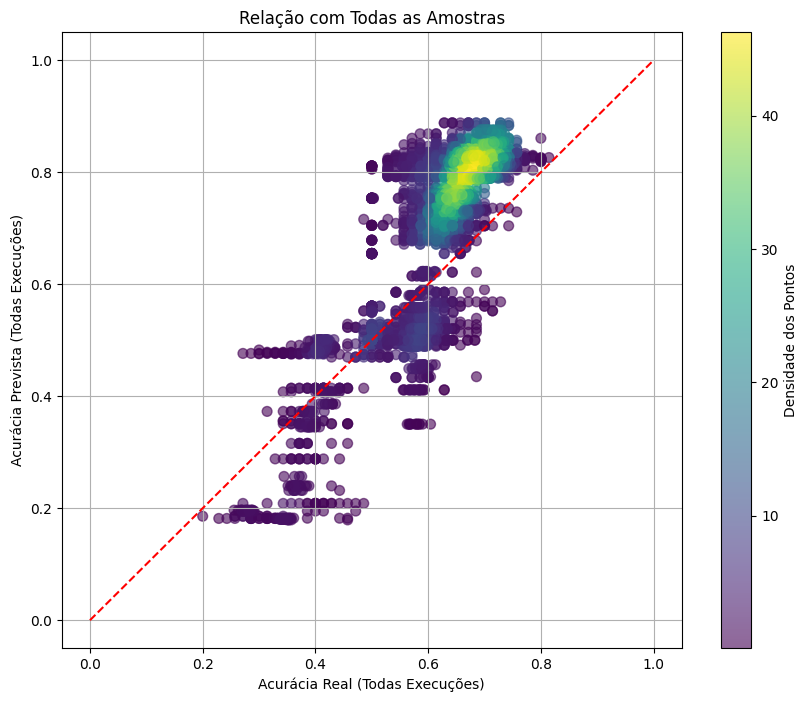

In [105]:
# plot dt regressor treshold
plot_regressor(y, y_pred_dt_rgs_treshold, "Decision Tree Regressor - Variance Treshold")